## Problem Statement:

### Business Goal:
- You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
##importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
##to get the complete picture
pd.set_option('display.width', 1500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
##Importing dataset
bike=pd.read_csv('day.csv')

In [4]:
#checking top 5 enteries
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#checking shape of the dataframe
bike.shape

(730, 16)

In [6]:
#checking info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
##Checking 5 point statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Quality Check

In [7]:
##Checking for Null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no null values in any attributes

## Dropping off  uncessary attributes

In [8]:
##Dropping uncessary columns
drop_col=['instant','dteday','temp','casual','registered']
bike.drop(drop_col, axis=1, inplace=True)

In [10]:
##Checking the dataframe
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [11]:
##creating a copy of  this dataframe
bike1=bike.copy()

### As per the data disctionary there are few categorical columns encoded in form of numbers, hence mapping values as informed  and then would create dummy variable.

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Holiday :weather day is a holiday or not
    - 1: Holiday
    - 0: No Holiday
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0
    - 1: Workingday
    - 0: Non_working day

#### Note: In the dataset there is no 4 in the 'weathersit' column, so I would go with 3 starting levels(1,2 and 3) 

In [12]:
##Mapping the repspective variables in the dataset with respect to the values  mentioned above:
bike[['season']]=bike[['season']].apply(lambda x: x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}))
bike[['mnth']]=bike[['mnth']].apply(lambda x: x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))
bike[['weekday']]=bike[['weekday']].apply(lambda x:x.map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'}))
bike[['weathersit']]=bike[['weathersit']].apply(lambda x:x.map({1:'Cloudy',2:'Mist',3:'Rainy'}))   
bike[['holiday']]=bike[['holiday']].apply(lambda x:x.map({1:'Holiday',0:'No Holiday'}))
bike[['workingday']]=bike[['workingday']].apply(lambda x:x.map({1:'Working day',0:'Non_working day'}))

In [13]:
#checking the dataframe
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,No Holiday,Monday,Working day,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,January,No Holiday,Tuesday,Working day,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,January,No Holiday,Wednesday,Working day,Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,No Holiday,Thursday,Working day,Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,No Holiday,Friday,Working day,Cloudy,11.46350,43.6957,12.522300,1600


In [15]:
##Checking if  the variables are named correctly or not
bike['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [16]:
bike['mnth'].value_counts()

March        62
August       62
December     62
May          62
July         62
January      62
October      62
June         60
September    60
April        60
November     60
February     56
Name: mnth, dtype: int64

In [17]:
bike['weekday'].value_counts()

Monday       105
Tuesday      105
Friday       104
Sunday       104
Thursday     104
Saturday     104
Wednesday    104
Name: weekday, dtype: int64

In [18]:
bike['weathersit'].value_counts()

Cloudy    463
Mist      246
Rainy      21
Name: weathersit, dtype: int64

## Bivariate Analysis

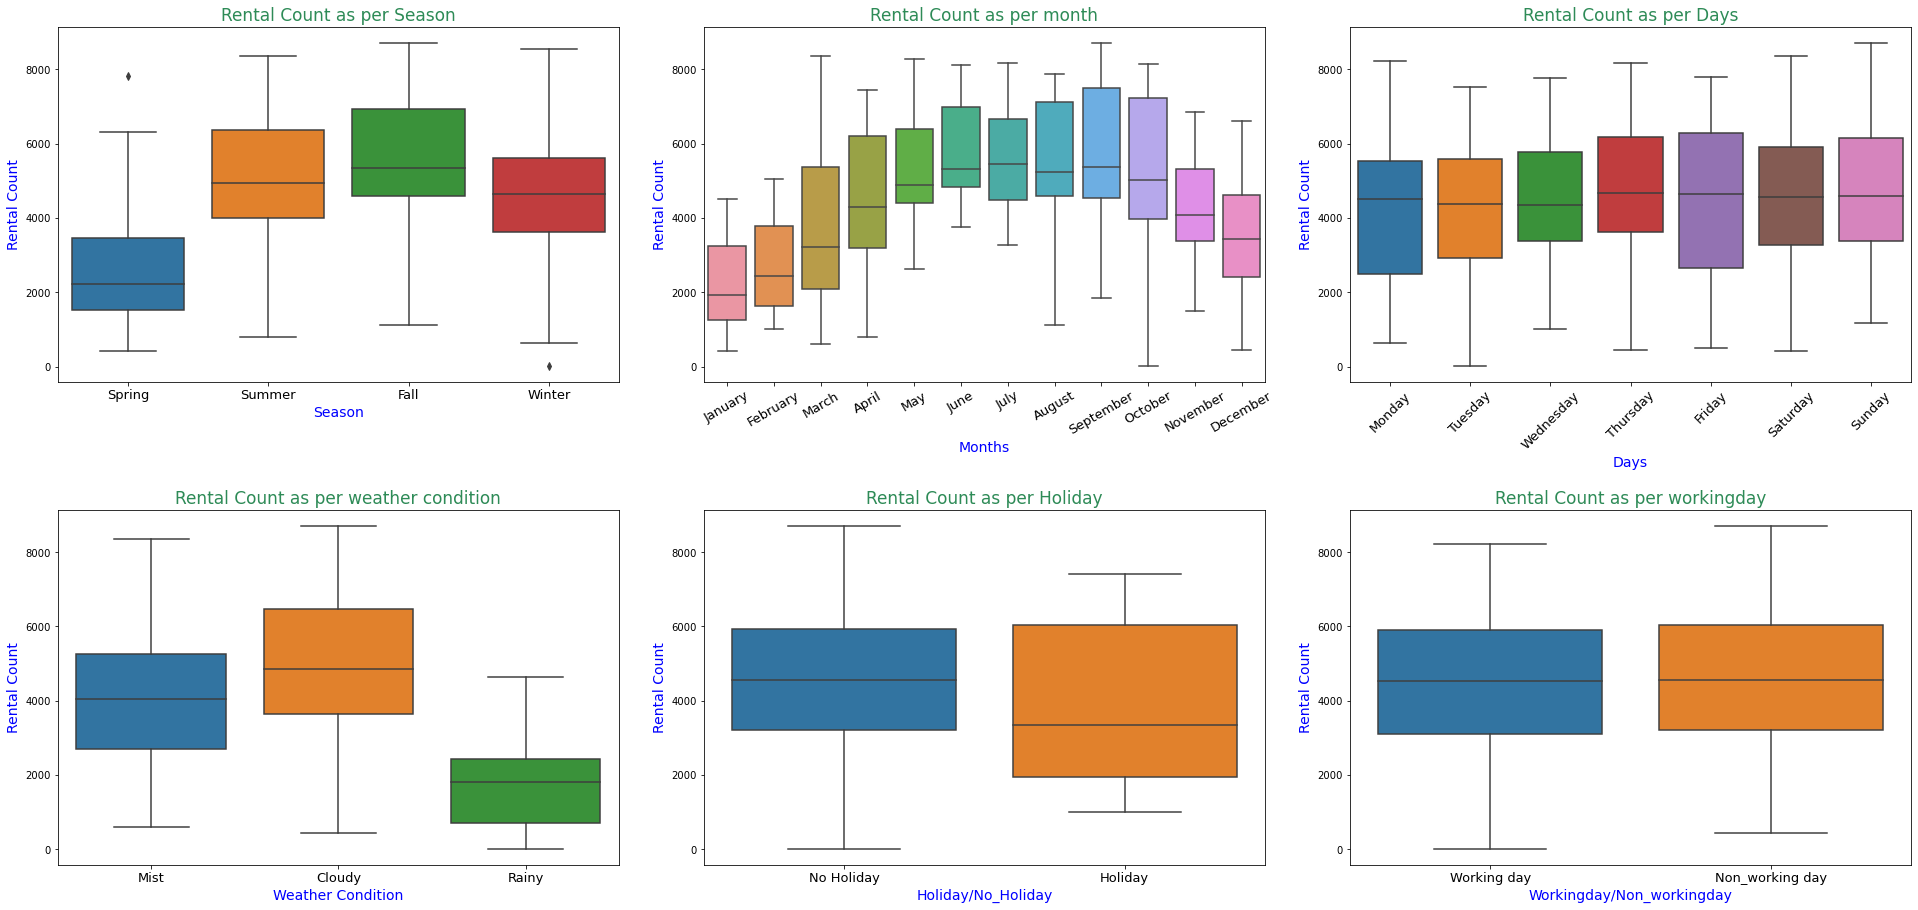

In [20]:
##let's get some intution as what is the count of bike  rentals in each categories
plt.figure(figsize=[27,13])
plt.subplot(2,3,1)
sns.boxplot(bike['season'],bike['cnt'])
plt.title('Rental Count as per Season',fontdict={'size':17,'color':'Seagreen'})
plt.xlabel('Season', fontdict={'size':14,'color':'Blue'})
plt.ylabel('Rental Count', fontdict={'size':14,'color':'Blue'})
plt.xticks(size=13)

plt.subplot(2,3,2)
sns.boxplot(bike['mnth'],bike['cnt'])
plt.title('Rental Count as per month',fontdict={'size':17,'color':'Seagreen'})
plt.xlabel('Months', fontdict={'size':14,'color':'Blue'})
plt.ylabel('Rental Count', fontdict={'size':14,'color':'Blue'})
plt.xticks(size=13,rotation=30)

plt.subplot(2,3,3)
sns.boxplot(bike['weekday'],bike['cnt'])
plt.title('Rental Count as per Days',fontdict={'size':17,'color':'Seagreen'})
plt.xlabel('Days', fontdict={'size':14,'color':'Blue'})
plt.ylabel('Rental Count', fontdict={'size':14,'color':'Blue'})
plt.xticks(size=13,rotation=45)

plt.subplot(2,3,4)
sns.boxplot(bike['weathersit'],bike['cnt'])
plt.title('Rental Count as per weather condition',fontdict={'size':17,'color':'Seagreen'})
plt.xlabel('Weather Condition', fontdict={'size':14,'color':'Blue'})
plt.ylabel('Rental Count', fontdict={'size':14,'color':'Blue'})
plt.xticks(size=13)

plt.subplot(2,3,5)
sns.boxplot(bike['holiday'],bike['cnt'])
plt.title('Rental Count as per Holiday',fontdict={'size':17,'color':'Seagreen'})
plt.xlabel('Holiday/No_Holiday', fontdict={'size':14,'color':'Blue'})
plt.ylabel('Rental Count', fontdict={'size':14,'color':'Blue'})
plt.xticks(size=13)


plt.subplot(2,3,6)
sns.boxplot(bike['workingday'],bike['cnt'])
plt.title('Rental Count as per workingday',fontdict={'size':17,'color':'Seagreen'})
plt.xlabel('Workingday/Non_workingday', fontdict={'size':14,'color':'Blue'})
plt.ylabel('Rental Count', fontdict={'size':14,'color':'Blue'})
plt.xticks(size=13)


plt.tight_layout(pad=2.0)

plt.show()

## Observation:
- Among seasons Spring has lower demand as compared to all other. Winter and  Fall season are competitive
- On checking the demand monthly wise, summer and fall season months  are the top demand months
- As per days each and every day's demand median is approximately same and the highest being of Sunday
- As per the weather condition, mist and cloudy has the highest demand, however rainy  season has the lower demand compared 
  to other two.
- Non holiday days has highr demand than holiday days, it can be good lead for the prediction of demand
- Demand on working day and non_working days are almost the same as they have the same median. So, when it is a non_working day which in term is a holiday the minimum demand is not starting from 0, it has some higher value which means people on holidays are renting bikes prior and planning for tours.

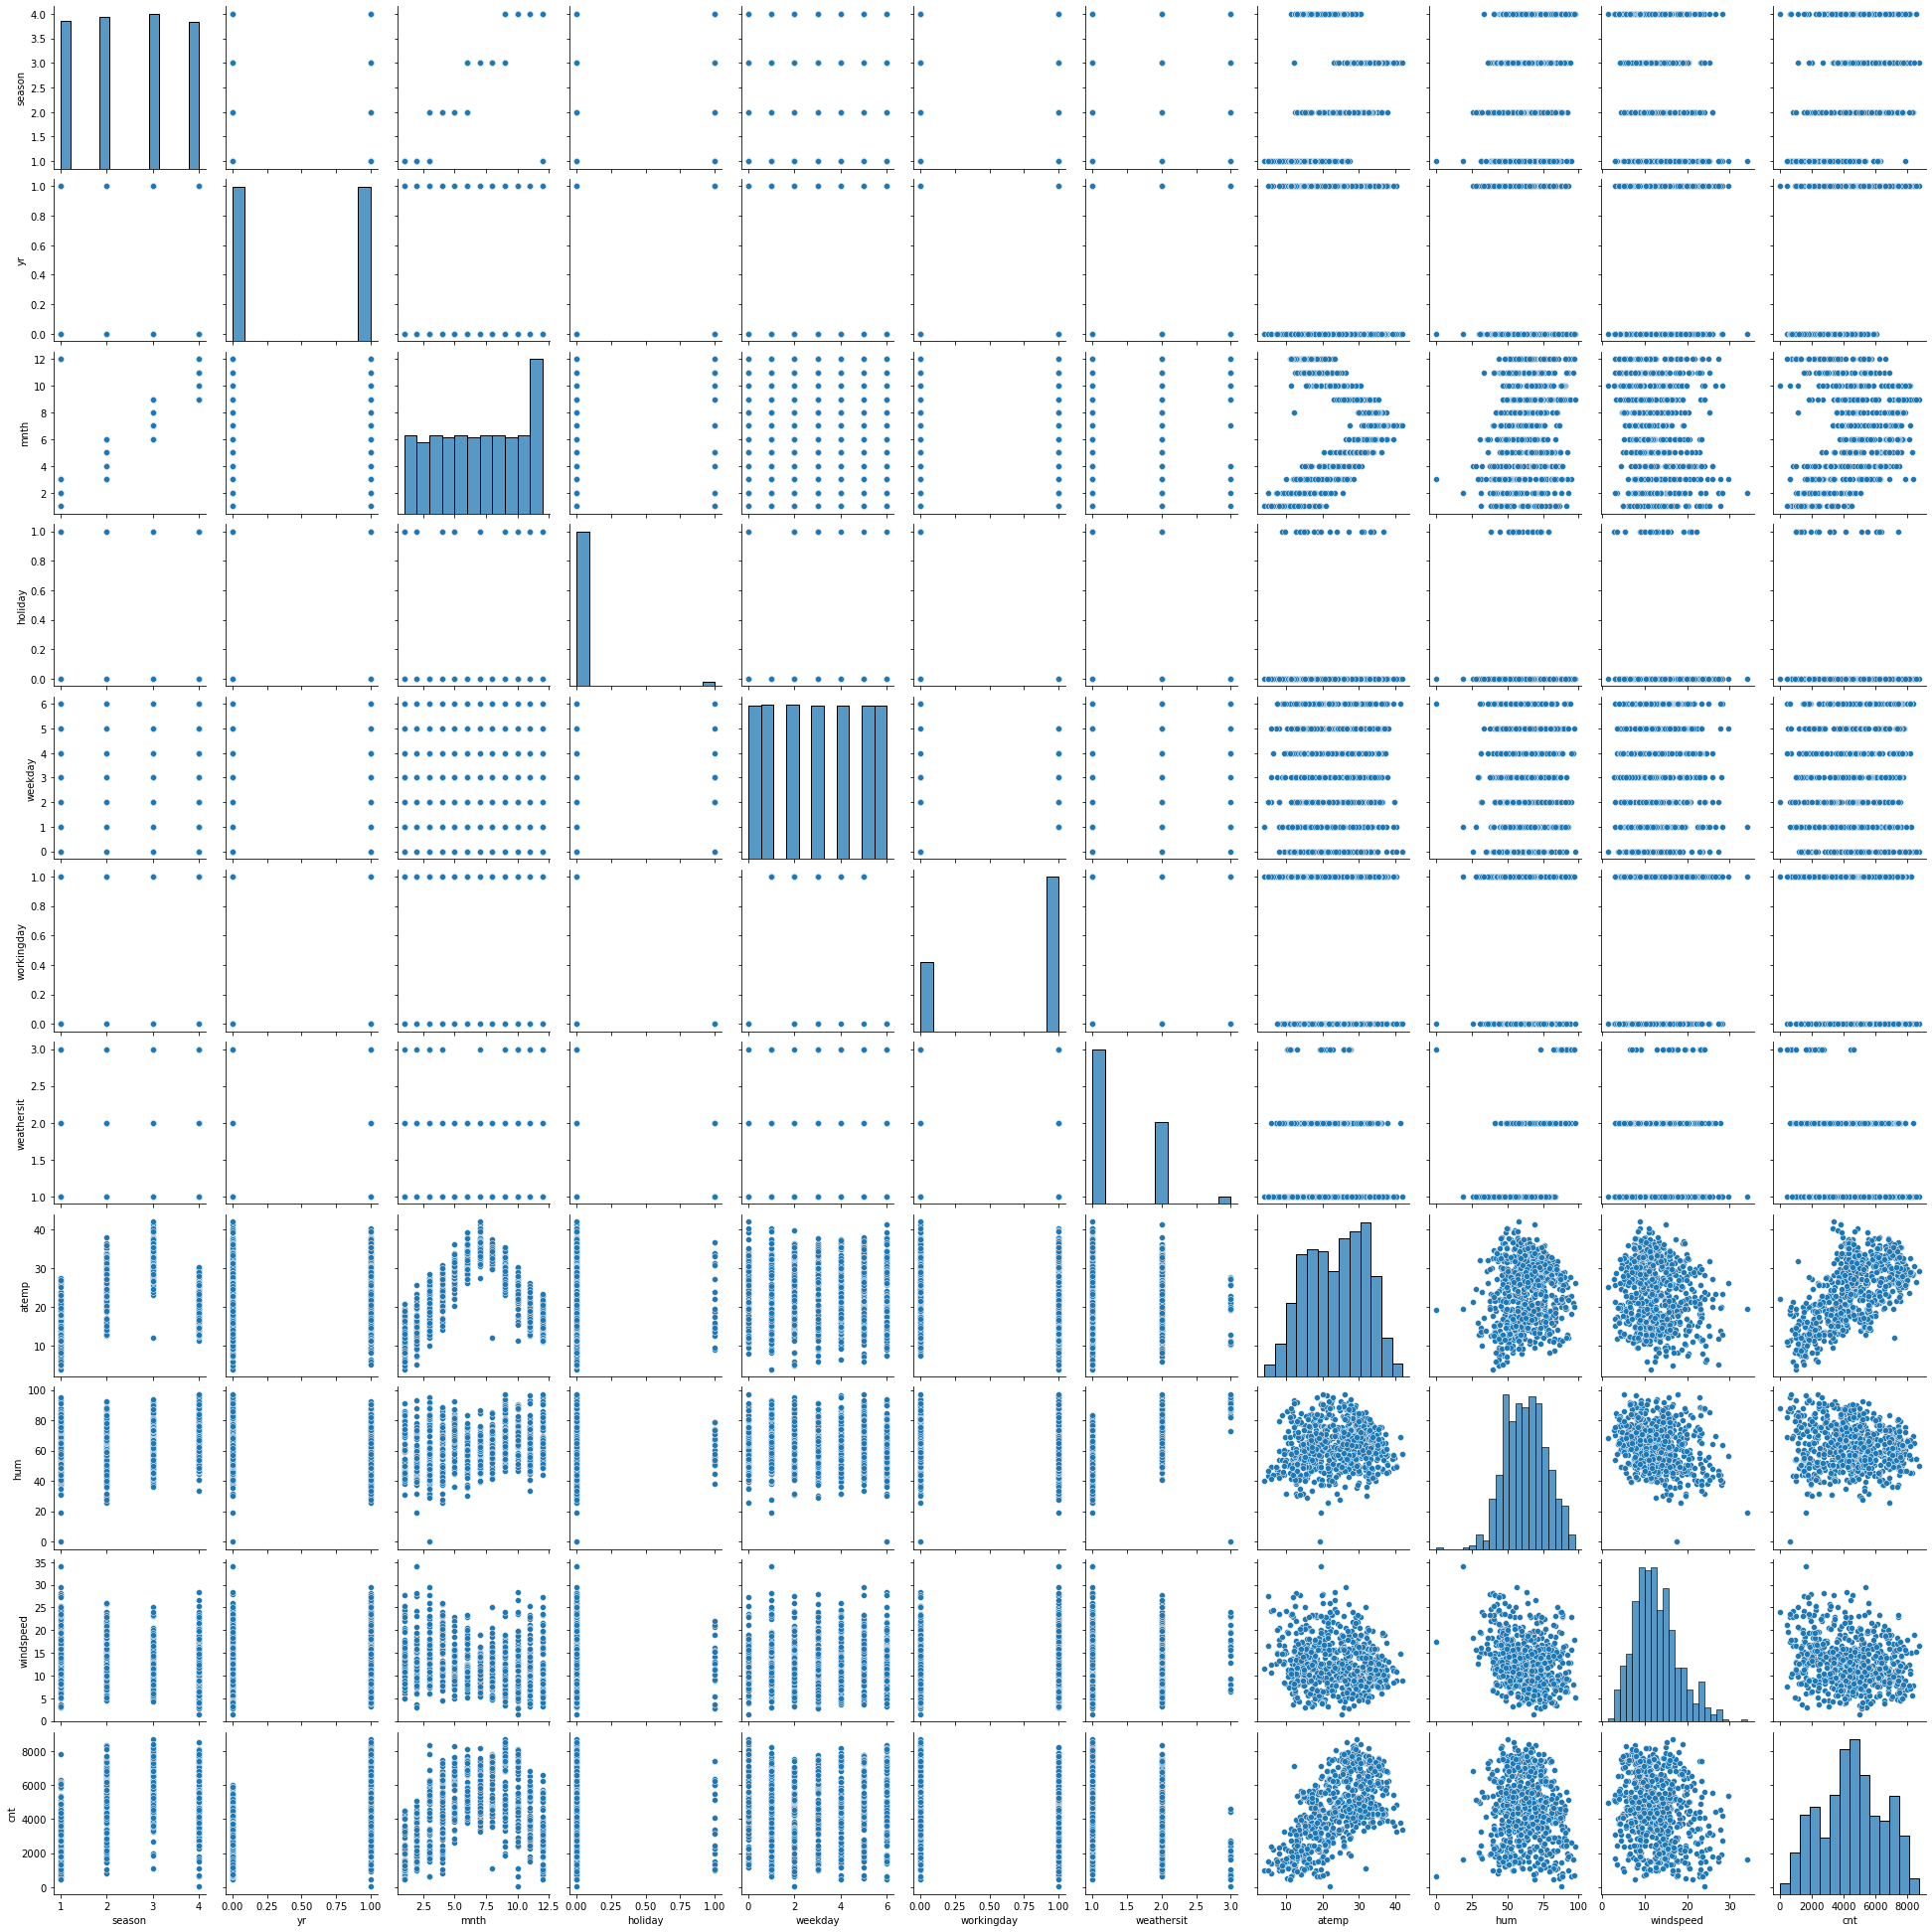

In [21]:
##Checking pairplots
sns.pairplot(bike1)
plt.show()

Observations:

- From the above plot the pattern of each attribute with respect to the target variable is as per the intution.

In [22]:
##Let's chalk out the categorical columns:
cat_cols=[]
for i in bike.columns:
    if bike[i].dtype not in ('float64','int64'):
        cat_cols.append(i)
cat_cols

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [23]:
##Now, we would do  one-hot encoding of the categorical values.
status=pd.get_dummies(bike[cat_cols])

In [24]:
status.head()

,season_Fall,season_Spring,season_Summer,season_Winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,holiday_Holiday,holiday_No Holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Non_working day,workingday_Working day,weathersit_Cloudy,weathersit_Mist,weathersit_Rainy
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0


In [25]:
##Mergeing the two data frames, i.e bike and status
bike=pd.concat([bike, status], axis=1)

In [27]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,holiday_Holiday,holiday_No Holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Non_working day,workingday_Working day,weathersit_Cloudy,weathersit_Mist,weathersit_Rainy
0,Spring,0,January,No Holiday,Monday,Working day,Mist,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,Spring,0,January,No Holiday,Tuesday,Working day,Mist,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
2,Spring,0,January,No Holiday,Wednesday,Working day,Cloudy,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0
3,Spring,0,January,No Holiday,Thursday,Working day,Cloudy,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,Spring,0,January,No Holiday,Friday,Working day,Cloudy,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0


In [28]:
##Dropping off categorical columns:
bike.drop(cat_cols, axis=1,inplace=True)

In [29]:
#checking the dataframe
bike.head()

,yr,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,holiday_Holiday,holiday_No Holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Non_working day,workingday_Working day,weathersit_Cloudy,weathersit_Mist,weathersit_Rainy
0,0,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,0,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
2,0,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0
3,0,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,0,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0


## Taking care of levels

- Season has 4 levels,so we need 3 dummies, dropping off 'season_Winter:
    - 000 indicates winter season
    - 001 indicates summer season
    - 010 indicates spring  season
    - 100 indicates Fall season
 
- Month has 12 levels,so we need 11 dummies, dropping off 'mnth-September'
    - 00000000000 indicates September month 
    - 00000000001 indicates October month
    - 00000000010 indicates November month
    - 00000000100 indicates May month
    - 00000001000 indicates March month
    - 00000010000 indicates June month
    - 00000100000 indicates July month
    - 00001000000 indicates January month
    - 00010000000 indicates February month
    - 00100000000 indicates December month
    - 01000000000 indicates August month
    - 10000000000 indicates April month
   

- There are 3 weather  conditions, so 2 dummy  variable is required. Dropping 'weathersit_Rainy'
    - 00 indicates Rainy weather
    - 01 indicates Mist Weather
    - 10 indicates Cloudy weather
    
- Working day has 2 levels, 1 dummy is needed. Dropping off 'workingday_Non_working day'
    - 0 indicates Non_working day
    - 1 indicates working day
    
- Holiday has 2 levels, 1 dummy is needed. Dropping off 'holiday_Holiday'
    - 0 indicates Holiday
    - 1 indicates Non_Holiday
    
    
- Weekday has 7 levels, 6 dummy can be used, dropping off 'weekday_Wednesday'
    - 000000 indicates wednesday
    - 000001 indicates Tuesday
    - 000010 indicates Thursday
    - 000100 indicates Sunday
    - 001000 indicates Saturday
    - 010000 indicates Monday
    - 100000 indicates Friday

In [30]:
##Dropping of extra columns:
bike.drop(['season_Winter','mnth_September','holiday_Holiday','workingday_Non_working day','weathersit_Rainy','weekday_Wednesday'], axis=1, inplace=True)

In [31]:
bike.head()

,yr,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,holiday_No Holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,workingday_Working day,weathersit_Cloudy,weathersit_Mist
0,0,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
1,0,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
2,0,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
4,0,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0


### Dividing dataset into train and test

In [32]:
##So, the dataset is now ready for modelling, hence splitting the data set into test and train
df_train, df_test=train_test_split(bike, train_size=0.7, random_state=100)

In [33]:
##Checking the shape
print(df_test.shape)
print(df_train.shape)

(220, 29)
(510, 29)


In [34]:
##let's scale the values using MinMaxScaler
scaler=MinMaxScaler()
num=['atemp','hum','windspeed','cnt']
df_train[num]=scaler.fit_transform(df_train[num])

In [35]:
#restting the index
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,yr,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,holiday_No Holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,workingday_Working day,weathersit_Cloudy,weathersit_Mist
0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,1,0.438975,0.640189,0.255342,0.465255,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,1,0.391735,0.504508,0.188475,0.482973,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,0.318819,0.751824,0.380981,0.191095,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


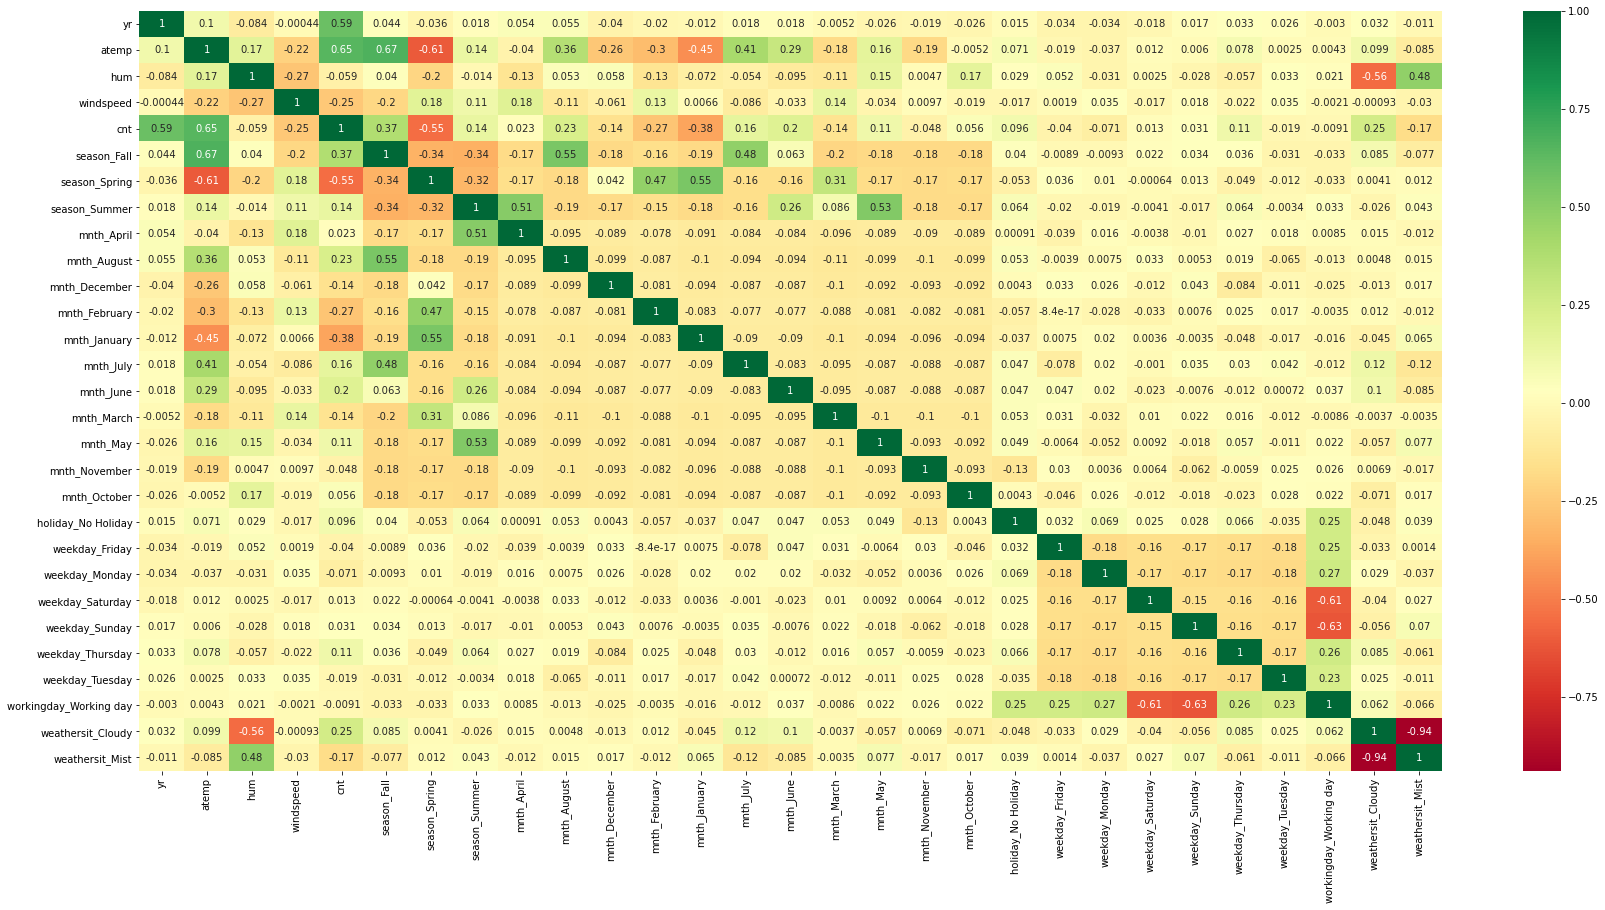

In [36]:
##Let's have a look at the heatmap
plt.figure(figsize=[25,13])
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot=True)
plt.tight_layout(pad=2.0)
plt.show()

In [37]:
##Proceeding towards the model building, seperating target variable and other atributes
y_train=df_train.pop('cnt')
X_train=df_train

### Model 1

In [38]:
##using Statsmodel,will use RFA for feature selection.
#Building the model with all the features.

##adding constant
X_train_sm=sm.add_constant(X_train)

##sing OLS to create the first model
lr1=sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model1=lr1.fit()

#checking summary
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.81
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          4.50e-177
Time:                        10:24:32   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     481   BIC:                            -857.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2290      0.063      3.657      0.000       0.106       0.352
yr                         0.2330      0.008     28.480      0.000       0.217       0.249
atemp                      0.4104      0.046      8.958      0.000       0.320       0.500
hum                       -0.1519      0.039     -3.878      0.000      -0.229      -0.075
windspeed                 -0.1649      0.026     -6.279      0.000      -0.216      -0.113
season_Fall               -0.1067      0.028     -3.761      0.000      -0.162      -0.051
season_Spring             -0.1541      0.026     -5.827      0.000      -0.206      -0.102
season_Summer             -0.0685      0.030     -2.262      0.024      -0.128      -0.009
mnth_April                -0.1004      0.032     -3.106      0.002      -0.164      -0.037
mnth_August               -0.0516      0.021     -2.509      0.012      -0.092      -0.011
mnth_December             -0.1534      0.031     -4.942      0.000      -0.214      -0.092
mnth_February             -0.1458      0.037     -3.960      0.000      -0.218      -0.073
mnth_January              -0.1752      0.037     -4.693      0.000      -0.249      -0.102
mnth_July                 -0.1096      0.023     -4.852      0.000      -0.154      -0.065
mnth_June                 -0.0723      0.026     -2.729      0.007      -0.124      -0.020
mnth_March                -0.1015      0.031     -3.233      0.001      -0.163      -0.040
mnth_May                  -0.0640      0.031     -2.032      0.043      -0.126      -0.002
mnth_November             -0.1460      0.032     -4.627      0.000      -0.208      -0.084
mnth_October              -0.0948      0.030     -3.152      0.002      -0.154      -0.036
holiday_No Holiday         0.1337      0.066      2.028      0.043       0.004       0.263
weekday_Friday             0.0111      0.015      0.719      0.473      -0.019       0.041
weekday_Monday            -0.0148      0.015     -0.969      0.333      -0.045       0.015
weekday_Saturday          -0.0470      0.071     -0.658      0.511      -0.187       0.093
weekday_Sunday            -0.0442      0.071     -0.620      0.536      -0.184       0.096
weekday_Thursday           0.0152      0.016      0.980      0.328      -0.015       0.046
weekday_Tuesday           -0.0158      0.015     -1.045      0.297      -0.045       0.014
workingday_Working day    -0.0657      0.072     -0.918      0.359      -0.207       0.075
weathersit_Cloudy          0.2478      0.027      9.211      0.000       0.195       0.301
weathersit_Mist            0.1884      0.025      7.408      0.000       0.138       0.238
==============================================================================
Omnibus:                       79.764   Durbin-Watson:                   2.003
Prob(Omnibus)

In [39]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
18,holiday_No Holiday,266.67
25,workingday_Working day,221.47
22,weekday_Sunday,42.10
21,weekday_Saturday,39.76
1,atemp,37.02
2,hum,32.44
26,weathersit_Cloudy,20.20
6,season_Summer,13.45
4,season_Fall,11.43
27,weathersit_Mist,11.07


### Dropping 'weekday_Sunday'

In [40]:
##removing weekday_Sunday
X_train1=X_train.drop('weekday_Sunday',axis=1)

### Model 2

In [41]:
##Rebuilding model
##adding constant
X_train_sm1=sm.add_constant(X_train1)

##sing OLS to create the first model
lr2=sm.OLS(y_train, X_train_sm1)

#fitting the model
lr_model2=lr2.fit()

#checking summary
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.47
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          5.40e-178
Time:                        10:27:38   Log-Likelihood:                 519.02
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     482   BIC:                            -863.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2212      0.061      3.609      0.000       0.101       0.342
yr                         0.2333      0.008     28.591      0.000       0.217       0.249
atemp                      0.4111      0.046      8.982      0.000       0.321       0.501
hum                       -0.1510      0.039     -3.860      0.000      -0.228      -0.074
windspeed                 -0.1655      0.026     -6.310      0.000      -0.217      -0.114
season_Fall               -0.1062      0.028     -3.748      0.000      -0.162      -0.051
season_Spring             -0.1534      0.026     -5.809      0.000      -0.205      -0.102
season_Summer             -0.0679      0.030     -2.245      0.025      -0.127      -0.008
mnth_April                -0.1004      0.032     -3.109      0.002      -0.164      -0.037
mnth_August               -0.0520      0.021     -2.532      0.012      -0.092      -0.012
mnth_December             -0.1531      0.031     -4.936      0.000      -0.214      -0.092
mnth_February             -0.1456      0.037     -3.956      0.000      -0.218      -0.073
mnth_January              -0.1750      0.037     -4.692      0.000      -0.248      -0.102
mnth_July                 -0.1101      0.023     -4.878      0.000      -0.154      -0.066
mnth_June                 -0.0727      0.026     -2.748      0.006      -0.125      -0.021
mnth_March                -0.1017      0.031     -3.242      0.001      -0.163      -0.040
mnth_May                  -0.0644      0.031     -2.046      0.041      -0.126      -0.003
mnth_November             -0.1470      0.032     -4.667      0.000      -0.209      -0.085
mnth_October              -0.0944      0.030     -3.142      0.002      -0.154      -0.035
holiday_No Holiday         0.0967      0.028      3.472      0.001       0.042       0.151
weekday_Friday             0.0116      0.015      0.753      0.452      -0.019       0.042
weekday_Monday            -0.0143      0.015     -0.941      0.347      -0.044       0.016
weekday_Saturday          -0.0038      0.015     -0.246      0.806      -0.034       0.027
weekday_Thursday           0.0156      0.016      1.008      0.314      -0.015       0.046
weekday_Tuesday           -0.0151      0.015     -1.004      0.316      -0.045       0.014
workingday_Working day    -0.0224      0.016     -1.434      0.152      -0.053       0.008
weathersit_Cloudy          0.2477      0.027      9.214      0.000       0.195       0.300
weathersit_Mist            0.1883      0.025      7.410      0.000       0.138       0.238
==============================================================================
Omnibus:                       79.720   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.540
Skew:                    

In [42]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train1.columns
vif['VIF']=[variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
18,holiday_No Holiday,39.03
1,atemp,36.96
2,hum,32.26
25,weathersit_Cloudy,19.81
6,season_Summer,13.45
4,season_Fall,11.40
24,workingday_Working day,10.96
26,weathersit_Mist,10.93
5,season_Spring,10.40
11,mnth_January,6.58


### Dropping weekday_Saturday because of high p value

In [43]:
##Dropping of  weekday_Saturday and rebuilding the model:
X_train2=X_train1.drop('weekday_Saturday',axis=1)

### Model 3

In [44]:
##Rebuilding model
##adding constant
X_train_sm2=sm.add_constant(X_train2)

##sing OLS to create the first model
lr3=sm.OLS(y_train, X_train_sm2)

#fitting the model
lr_model3=lr3.fit()

#checking summary
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          5.41e-179
Time:                        10:30:35   Log-Likelihood:                 518.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     483   BIC:                            -869.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2206      0.061      3.605      0.000       0.100       0.341
yr                         0.2333      0.008     28.635      0.000       0.217       0.249
atemp                      0.4112      0.046      8.992      0.000       0.321       0.501
hum                       -0.1511      0.039     -3.866      0.000      -0.228      -0.074
windspeed                 -0.1653      0.026     -6.312      0.000      -0.217      -0.114
season_Fall               -0.1061      0.028     -3.750      0.000      -0.162      -0.051
season_Spring             -0.1536      0.026     -5.825      0.000      -0.205      -0.102
season_Summer             -0.0680      0.030     -2.250      0.025      -0.127      -0.009
mnth_April                -0.1003      0.032     -3.109      0.002      -0.164      -0.037
mnth_August               -0.0521      0.021     -2.539      0.011      -0.092      -0.012
mnth_December             -0.1528      0.031     -4.935      0.000      -0.214      -0.092
mnth_February             -0.1452      0.037     -3.953      0.000      -0.217      -0.073
mnth_January              -0.1748      0.037     -4.692      0.000      -0.248      -0.102
mnth_July                 -0.1100      0.023     -4.880      0.000      -0.154      -0.066
mnth_June                 -0.0726      0.026     -2.747      0.006      -0.125      -0.021
mnth_March                -0.1015      0.031     -3.240      0.001      -0.163      -0.040
mnth_May                  -0.0643      0.031     -2.047      0.041      -0.126      -0.003
mnth_November             -0.1472      0.031     -4.678      0.000      -0.209      -0.085
mnth_October              -0.0944      0.030     -3.143      0.002      -0.153      -0.035
holiday_No Holiday         0.0951      0.027      3.515      0.000       0.042       0.148
weekday_Friday             0.0116      0.015      0.756      0.450      -0.019       0.042
weekday_Monday            -0.0143      0.015     -0.941      0.347      -0.044       0.016
weekday_Thursday           0.0157      0.016      1.009      0.313      -0.015       0.046
weekday_Tuesday           -0.0151      0.015     -1.004      0.316      -0.045       0.014
workingday_Working day    -0.0206      0.014     -1.500      0.134      -0.048       0.006
weathersit_Cloudy          0.2479      0.027      9.239      0.000       0.195       0.301
weathersit_Mist            0.1887      0.025      7.441      0.000       0.139       0.238
==============================================================================
Omnibus:                       79.219   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.470
Skew:                          -0.750   Prob(JB):                     2.98e-49
Kurtosis:                       5.875

In [45]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train2.columns
vif['VIF']=[variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,atemp,36.96
18,holiday_No Holiday,36.02
2,hum,32.23
24,weathersit_Cloudy,19.80
6,season_Summer,13.44
4,season_Fall,11.40
25,weathersit_Mist,10.92
5,season_Spring,10.38
23,workingday_Working day,8.43
11,mnth_January,6.58


### Dropping weekday_Friday because of high p value

In [46]:
##Dropping 'weekday_Friday' and rebuilding
X_train3=X_train2.drop('weekday_Friday',axis=1)

### Model 4

In [47]:
##Rebuilding model
##adding constant
X_train_sm3=sm.add_constant(X_train3)

##sing OLS to create the first model
lr4=sm.OLS(y_train, X_train_sm3)

#fitting the model
lr_model4=lr4.fit()

#checking summary
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          6.84e-180
Time:                        10:33:24   Log-Likelihood:                 518.69
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     484   BIC:                            -875.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2219      0.061      3.630      0.000       0.102       0.342
yr                         0.2332      0.008     28.638      0.000       0.217       0.249
atemp                      0.4128      0.046      9.039      0.000       0.323       0.502
hum                       -0.1507      0.039     -3.857      0.000      -0.227      -0.074
windspeed                 -0.1646      0.026     -6.292      0.000      -0.216      -0.113
season_Fall               -0.1052      0.028     -3.723      0.000      -0.161      -0.050
season_Spring             -0.1527      0.026     -5.801      0.000      -0.204      -0.101
season_Summer             -0.0677      0.030     -2.240      0.026      -0.127      -0.008
mnth_April                -0.1002      0.032     -3.108      0.002      -0.164      -0.037
mnth_August               -0.0529      0.021     -2.578      0.010      -0.093      -0.013
mnth_December             -0.1520      0.031     -4.914      0.000      -0.213      -0.091
mnth_February             -0.1451      0.037     -3.951      0.000      -0.217      -0.073
mnth_January              -0.1747      0.037     -4.690      0.000      -0.248      -0.101
mnth_July                 -0.1109      0.022     -4.933      0.000      -0.155      -0.067
mnth_June                 -0.0724      0.026     -2.740      0.006      -0.124      -0.020
mnth_March                -0.1011      0.031     -3.230      0.001      -0.163      -0.040
mnth_May                  -0.0645      0.031     -2.054      0.041      -0.126      -0.003
mnth_November             -0.1462      0.031     -4.653      0.000      -0.208      -0.084
mnth_October              -0.0945      0.030     -3.149      0.002      -0.153      -0.036
holiday_No Holiday         0.0930      0.027      3.456      0.001       0.040       0.146
weekday_Monday            -0.0205      0.013     -1.598      0.111      -0.046       0.005
weekday_Thursday           0.0095      0.013      0.721      0.471      -0.016       0.035
weekday_Tuesday           -0.0211      0.013     -1.651      0.099      -0.046       0.004
workingday_Working day    -0.0144      0.011     -1.309      0.191      -0.036       0.007
weathersit_Cloudy          0.2469      0.027      9.217      0.000       0.194       0.300
weathersit_Mist            0.1876      0.025      7.414      0.000       0.138       0.237
==============================================================================
Omnibus:                       78.734   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.353
Skew:                          -0.745   Prob(JB):                     5.21e-49
Kurtosis:                       5.871   Cond. No.                         46.5
=================================================

In [48]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train3.columns
vif['VIF']=[variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,atemp,36.84
18,holiday_No Holiday,35.64
2,hum,32.19
23,weathersit_Cloudy,19.77
6,season_Summer,13.43
4,season_Fall,11.36
24,weathersit_Mist,10.89
5,season_Spring,10.36
11,mnth_January,6.57
22,workingday_Working day,5.43


### Droppng weekday_Thursday because of high p value

In [49]:
##Dropping 'weekday_Saturday'  as it has high p and high VIF
X_train4=X_train3.drop('weekday_Thursday',axis=1)

### Model 5

In [50]:
##Rebuilding model
##adding constant
X_train_sm4=sm.add_constant(X_train4)

##sing OLS to create the first model
lr5=sm.OLS(y_train, X_train_sm4)

#fitting the model
lr_model5=lr5.fit()

#checking summary
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          8.26e-181
Time:                        10:35:35   Log-Likelihood:                 518.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     485   BIC:                            -881.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2208      0.061      3.616      0.000       0.101       0.341
yr                         0.2333      0.008     28.669      0.000       0.217       0.249
atemp                      0.4140      0.046      9.078      0.000       0.324       0.504
hum                       -0.1515      0.039     -3.884      0.000      -0.228      -0.075
windspeed                 -0.1646      0.026     -6.295      0.000      -0.216      -0.113
season_Fall               -0.1050      0.028     -3.717      0.000      -0.161      -0.050
season_Spring             -0.1529      0.026     -5.812      0.000      -0.205      -0.101
season_Summer             -0.0671      0.030     -2.224      0.027      -0.126      -0.008
mnth_April                -0.1002      0.032     -3.109      0.002      -0.164      -0.037
mnth_August               -0.0531      0.020     -2.594      0.010      -0.093      -0.013
mnth_December             -0.1522      0.031     -4.924      0.000      -0.213      -0.091
mnth_February             -0.1442      0.037     -3.931      0.000      -0.216      -0.072
mnth_January              -0.1744      0.037     -4.685      0.000      -0.247      -0.101
mnth_July                 -0.1108      0.022     -4.928      0.000      -0.155      -0.067
mnth_June                 -0.0733      0.026     -2.777      0.006      -0.125      -0.021
mnth_March                -0.1008      0.031     -3.222      0.001      -0.162      -0.039
mnth_May                  -0.0647      0.031     -2.060      0.040      -0.126      -0.003
mnth_November             -0.1460      0.031     -4.648      0.000      -0.208      -0.084
mnth_October              -0.0943      0.030     -3.142      0.002      -0.153      -0.035
holiday_No Holiday         0.0923      0.027      3.435      0.001       0.039       0.145
weekday_Monday            -0.0237      0.012     -1.976      0.049      -0.047      -0.000
weekday_Tuesday           -0.0243      0.012     -2.034      0.042      -0.048      -0.001
workingday_Working day    -0.0111      0.010     -1.111      0.267      -0.031       0.009
weathersit_Cloudy          0.2485      0.027      9.308      0.000       0.196       0.301
weathersit_Mist            0.1889      0.025      7.487      0.000       0.139       0.238
==============================================================================
Omnibus:                       79.268   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.219
Skew:                          -0.748   Prob(JB):                     1.24e-49
Kurtosis:                       5.891   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix

In [51]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train4.columns
vif['VIF']=[variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,atemp,36.80
18,holiday_No Holiday,35.54
2,hum,32.12
22,weathersit_Cloudy,19.64
6,season_Summer,13.43
4,season_Fall,11.36
23,weathersit_Mist,10.84
5,season_Spring,10.36
11,mnth_January,6.57
14,mnth_March,5.42


### Dropping workingday_Working day because of high p value

In [52]:
##Dropping 'workingday_Working day'  as it has high p and high VIF
X_train5=X_train4.drop('workingday_Working day',axis=1)

### Model 6

In [53]:
##Rebuilding model
##adding constant
X_train_sm5=sm.add_constant(X_train5)

##sing OLS to create the first model
lr6=sm.OLS(y_train, X_train_sm5)

#fitting the model
lr_model6=lr6.fit()

#checking summary
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.1
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.39e-181
Time:                        10:39:41   Log-Likelihood:                 517.77
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     486   BIC:                            -885.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2241      0.061      3.673      0.000       0.104       0.344
yr                     0.2333      0.008     28.662      0.000       0.217       0.249
atemp                  0.4139      0.046      9.073      0.000       0.324       0.504
hum                   -0.1538      0.039     -3.947      0.000      -0.230      -0.077
windspeed             -0.1642      0.026     -6.280      0.000      -0.216      -0.113
season_Fall           -0.1050      0.028     -3.717      0.000      -0.161      -0.049
season_Spring         -0.1521      0.026     -5.782      0.000      -0.204      -0.100
season_Summer         -0.0668      0.030     -2.214      0.027      -0.126      -0.008
mnth_April            -0.1010      0.032     -3.135      0.002      -0.164      -0.038
mnth_August           -0.0533      0.020     -2.599      0.010      -0.094      -0.013
mnth_December         -0.1523      0.031     -4.925      0.000      -0.213      -0.092
mnth_February         -0.1458      0.037     -3.978      0.000      -0.218      -0.074
mnth_January          -0.1756      0.037     -4.720      0.000      -0.249      -0.103
mnth_July             -0.1102      0.022     -4.902      0.000      -0.154      -0.066
mnth_June             -0.0741      0.026     -2.808      0.005      -0.126      -0.022
mnth_March            -0.1018      0.031     -3.256      0.001      -0.163      -0.040
mnth_May              -0.0658      0.031     -2.095      0.037      -0.127      -0.004
mnth_November         -0.1472      0.031     -4.687      0.000      -0.209      -0.085
mnth_October          -0.0946      0.030     -3.152      0.002      -0.154      -0.036
holiday_No Holiday     0.0842      0.026      3.255      0.001       0.033       0.135
weekday_Monday        -0.0280      0.011     -2.474      0.014      -0.050      -0.006
weekday_Tuesday       -0.0285      0.011     -2.503      0.013      -0.051      -0.006
weathersit_Cloudy      0.2478      0.027      9.284      0.000       0.195       0.300
weathersit_Mist        0.1893      0.025      7.503      0.000       0.140       0.239
==============================================================================
Omnibus:                       76.271   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.198
Skew:                          -0.709   Prob(JB):                     2.07e-49
Kurtosis:                       5.922   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train5.columns
vif['VIF']=[variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,atemp,36.80
18,holiday_No Holiday,32.82
2,hum,32.08
21,weathersit_Cloudy,19.64
6,season_Summer,13.42
4,season_Fall,11.36
22,weathersit_Mist,10.82
5,season_Spring,10.34
11,mnth_January,6.57
14,mnth_March,5.42


- From the VIF table above, 'atemp' has the highest VIF. So, let's drop the same.

In [55]:
##Dropping off  'atemp'
X_train6=X_train5.drop('atemp',axis=1)

### Model 7

In [56]:
##Rebuilding model
##adding constant
X_train_sm6=sm.add_constant(X_train6)

##sing OLS to create the first model
lr7=sm.OLS(y_train, X_train_sm6)

#fitting the model
lr_model7=lr7.fit()

#checking summary
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     101.7
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          3.21e-166
Time:                        10:45:57   Log-Likelihood:                 477.87
No. Observations:                 510   AIC:                            -909.7
Df Residuals:                     487   BIC:                            -812.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3930      0.063      6.261      0.000       0.270       0.516
yr                     0.2445      0.009     28.140      0.000       0.227       0.262
hum                   -0.0584      0.041     -1.440      0.150      -0.138       0.021
windspeed             -0.1737      0.028     -6.153      0.000      -0.229      -0.118
season_Fall           -0.0867      0.030     -2.847      0.005      -0.147      -0.027
season_Spring         -0.1630      0.028     -5.742      0.000      -0.219      -0.107
season_Summer         -0.0801      0.033     -2.460      0.014      -0.144      -0.016
mnth_April            -0.1345      0.035     -3.887      0.000      -0.202      -0.066
mnth_August           -0.0195      0.022     -0.895      0.371      -0.062       0.023
mnth_December         -0.2671      0.030     -8.762      0.000      -0.327      -0.207
mnth_February         -0.2668      0.037     -7.234      0.000      -0.339      -0.194
mnth_January          -0.3284      0.036     -9.161      0.000      -0.399      -0.258
mnth_July             -0.0463      0.023     -2.006      0.045      -0.092      -0.001
mnth_June             -0.0221      0.028     -0.795      0.427      -0.077       0.033
mnth_March            -0.1725      0.033     -5.270      0.000      -0.237      -0.108
mnth_May              -0.0516      0.034     -1.525      0.128      -0.118       0.015
mnth_November         -0.2410      0.032     -7.526      0.000      -0.304      -0.178
mnth_October          -0.1399      0.032     -4.377      0.000      -0.203      -0.077
holiday_No Holiday     0.0756      0.028      2.705      0.007       0.021       0.130
weekday_Monday        -0.0350      0.012     -2.866      0.004      -0.059      -0.011
weekday_Tuesday       -0.0304      0.012     -2.477      0.014      -0.055      -0.006
weathersit_Cloudy      0.2843      0.029      9.974      0.000       0.228       0.340
weathersit_Mist        0.2074      0.027      7.632      0.000       0.154       0.261
==============================================================================
Omnibus:                       76.872   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.434
Skew:                          -0.647   Prob(JB):                     3.46e-61
Kurtosis:                       6.381   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train6.columns
vif['VIF']=[variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
17,holiday_No Holiday,32.35
1,hum,23.70
20,weathersit_Cloudy,16.49
5,season_Summer,13.41
3,season_Fall,10.85
4,season_Spring,10.34
21,weathersit_Mist,10.07
10,mnth_January,5.62
13,mnth_March,5.27
2,windspeed,5.17


- Dropping off 'hum' as high P and high VIF

In [59]:
#dropping 'hum'
X_train7=X_train6.drop('hum',axis=1)

### Model 8

In [60]:
##Rebuilding model
##adding constant
X_train_sm7=sm.add_constant(X_train7)

##sing OLS to create the first model
lr8=sm.OLS(y_train, X_train_sm7)

#fitting the model
lr_model8=lr8.fit()

#checking summary
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          8.58e-167
Time:                        10:52:04   Log-Likelihood:                 476.78
No. Observations:                 510   AIC:                            -909.6
Df Residuals:                     488   BIC:                            -816.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3358      0.049      6.903      0.000       0.240       0.431
yr                     0.2455      0.009     28.296      0.000       0.228       0.263
windspeed             -0.1625      0.027     -5.982      0.000      -0.216      -0.109
season_Fall           -0.0863      0.030     -2.831      0.005      -0.146      -0.026
season_Spring         -0.1627      0.028     -5.724      0.000      -0.219      -0.107
season_Summer         -0.0815      0.033     -2.501      0.013      -0.146      -0.017
mnth_April            -0.1277      0.034     -3.722      0.000      -0.195      -0.060
mnth_August           -0.0181      0.022     -0.830      0.407      -0.061       0.025
mnth_December         -0.2653      0.030     -8.700      0.000      -0.325      -0.205
mnth_February         -0.2611      0.037     -7.113      0.000      -0.333      -0.189
mnth_January          -0.3234      0.036     -9.055      0.000      -0.394      -0.253
mnth_July             -0.0432      0.023     -1.878      0.061      -0.088       0.002
mnth_June             -0.0171      0.028     -0.618      0.537      -0.071       0.037
mnth_March            -0.1670      0.033     -5.132      0.000      -0.231      -0.103
mnth_May              -0.0505      0.034     -1.489      0.137      -0.117       0.016
mnth_November         -0.2381      0.032     -7.442      0.000      -0.301      -0.175
mnth_October          -0.1398      0.032     -4.369      0.000      -0.203      -0.077
holiday_No Holiday     0.0759      0.028      2.713      0.007       0.021       0.131
weekday_Monday        -0.0350      0.012     -2.866      0.004      -0.059      -0.011
weekday_Tuesday       -0.0319      0.012     -2.607      0.009      -0.056      -0.008
weathersit_Cloudy      0.3000      0.026     11.369      0.000       0.248       0.352
weathersit_Mist        0.2142      0.027      7.998      0.000       0.162       0.267
==============================================================================
Omnibus:                       77.918   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.260
Skew:                          -0.661   Prob(JB):                     3.77e-61
Kurtosis:                       6.368   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train7.columns
vif['VIF']=[variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
16,holiday_No Holiday,26.70
19,weathersit_Cloudy,16.47
4,season_Summer,12.66
3,season_Spring,10.19
20,weathersit_Mist,9.51
2,season_Fall,9.38
9,mnth_January,5.54
12,mnth_March,5.24
13,mnth_May,5.12
1,windspeed,5.10


- Dropping 'mnth_June' as high p value

In [62]:
##Dropping 'mnth_June'
X_train8=X_train7.drop('mnth_June',axis=1)

### Model 9

In [63]:
##Rebuilding model
##adding constant
X_train_sm8=sm.add_constant(X_train8)

##sing OLS to create the first model
lr9=sm.OLS(y_train, X_train_sm8)

#fitting the model
lr_model9=lr9.fit()

#checking summary
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          9.67e-168
Time:                        10:57:01   Log-Likelihood:                 476.59
No. Observations:                 510   AIC:                            -911.2
Df Residuals:                     489   BIC:                            -822.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3325      0.048      6.881      0.000       0.238       0.427
yr                     0.2454      0.009     28.308      0.000       0.228       0.262
windspeed             -0.1627      0.027     -5.995      0.000      -0.216      -0.109
season_Fall           -0.0861      0.030     -2.827      0.005      -0.146      -0.026
season_Spring         -0.1680      0.027     -6.206      0.000      -0.221      -0.115
season_Summer         -0.0912      0.029     -3.190      0.002      -0.147      -0.035
mnth_April            -0.1126      0.024     -4.677      0.000      -0.160      -0.065
mnth_August           -0.0128      0.020     -0.640      0.522      -0.052       0.027
mnth_December         -0.2583      0.028     -9.123      0.000      -0.314      -0.203
mnth_February         -0.2504      0.032     -7.740      0.000      -0.314      -0.187
mnth_January          -0.3128      0.031    -10.001      0.000      -0.374      -0.251
mnth_July             -0.0378      0.021     -1.778      0.076      -0.080       0.004
mnth_March            -0.1547      0.026     -6.015      0.000      -0.205      -0.104
mnth_May              -0.0355      0.024     -1.502      0.134      -0.082       0.011
mnth_November         -0.2328      0.031     -7.558      0.000      -0.293      -0.172
mnth_October          -0.1345      0.031     -4.365      0.000      -0.195      -0.074
holiday_No Holiday     0.0746      0.028      2.676      0.008       0.020       0.129
weekday_Monday        -0.0350      0.012     -2.864      0.004      -0.059      -0.011
weekday_Tuesday       -0.0320      0.012     -2.615      0.009      -0.056      -0.008
weathersit_Cloudy      0.2990      0.026     11.359      0.000       0.247       0.351
weathersit_Mist        0.2139      0.027      7.993      0.000       0.161       0.267
==============================================================================
Omnibus:                       78.076   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.826
Skew:                          -0.661   Prob(JB):                     1.72e-61
Kurtosis:                       6.379   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train8.columns
vif['VIF']=[variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
15,holiday_No Holiday,25.90
18,weathersit_Cloudy,16.13
19,weathersit_Mist,9.43
2,season_Fall,9.34
3,season_Spring,9.05
4,season_Summer,8.85
1,windspeed,5.10
9,mnth_January,4.30
8,mnth_February,3.48
11,mnth_March,3.30


- Dropping of 'mnth_August' as high p value

In [65]:
##Dropping mnth_August
X_train9=X_train8.drop('mnth_August',axis=1)

### Model 10

In [66]:
##Rebuilding model
##adding constant
X_train_sm9=sm.add_constant(X_train9)

##sing OLS to create the first model
lr10=sm.OLS(y_train, X_train_sm9)

#fitting the model
lr_model10=lr10.fit()

#checking summary
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     117.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.08e-168
Time:                        11:01:54   Log-Likelihood:                 476.37
No. Observations:                 510   AIC:                            -912.7
Df Residuals:                     490   BIC:                            -828.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3347      0.048      6.947      0.000       0.240       0.429
yr                     0.2452      0.009     28.321      0.000       0.228       0.262
windspeed             -0.1628      0.027     -6.001      0.000      -0.216      -0.109
season_Fall           -0.0928      0.029     -3.245      0.001      -0.149      -0.037
season_Spring         -0.1680      0.027     -6.211      0.000      -0.221      -0.115
season_Summer         -0.0912      0.029     -3.193      0.001      -0.147      -0.035
mnth_April            -0.1126      0.024     -4.681      0.000      -0.160      -0.065
mnth_December         -0.2584      0.028     -9.131      0.000      -0.314      -0.203
mnth_February         -0.2505      0.032     -7.748      0.000      -0.314      -0.187
mnth_January          -0.3128      0.031    -10.008      0.000      -0.374      -0.251
mnth_July             -0.0312      0.019     -1.679      0.094      -0.068       0.005
mnth_March            -0.1548      0.026     -6.020      0.000      -0.205      -0.104
mnth_May              -0.0355      0.024     -1.504      0.133      -0.082       0.011
mnth_November         -0.2330      0.031     -7.568      0.000      -0.293      -0.172
mnth_October          -0.1347      0.031     -4.373      0.000      -0.195      -0.074
holiday_No Holiday     0.0736      0.028      2.645      0.008       0.019       0.128
weekday_Monday        -0.0352      0.012     -2.883      0.004      -0.059      -0.011
weekday_Tuesday       -0.0318      0.012     -2.601      0.010      -0.056      -0.008
weathersit_Cloudy      0.2980      0.026     11.348      0.000       0.246       0.350
weathersit_Mist        0.2129      0.027      7.973      0.000       0.160       0.265
==============================================================================
Omnibus:                       78.082   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.316
Skew:                          -0.661   Prob(JB):                     1.35e-61
Kurtosis:                       6.383   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train9.columns
vif['VIF']=[variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
14,holiday_No Holiday,25.89
17,weathersit_Cloudy,16.12
18,weathersit_Mist,9.42
3,season_Spring,9.05
4,season_Summer,8.84
2,season_Fall,8.11
1,windspeed,5.10
8,mnth_January,4.29
7,mnth_February,3.48
10,mnth_March,3.30


- Dropping mnth_May because high p value

In [68]:
##Dropping mnth_May
X_train10=X_train9.drop('mnth_May',axis=1)

### Model 11

In [69]:
##Rebuilding model
##adding constant
X_train_sm10=sm.add_constant(X_train10)

##sing OLS to create the first model
lr11=sm.OLS(y_train, X_train_sm10)

#fitting the model
lr_model11=lr11.fit()

#checking summary
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     123.7
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          2.92e-169
Time:                        11:08:04   Log-Likelihood:                 475.20
No. Observations:                 510   AIC:                            -912.4
Df Residuals:                     491   BIC:                            -831.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3269      0.048      6.817      0.000       0.233       0.421
yr                     0.2455      0.009     28.329      0.000       0.228       0.263
windspeed             -0.1623      0.027     -5.975      0.000      -0.216      -0.109
season_Fall           -0.0851      0.028     -3.020      0.003      -0.140      -0.030
season_Spring         -0.1760      0.027     -6.623      0.000      -0.228      -0.124
season_Summer         -0.1049      0.027     -3.870      0.000      -0.158      -0.052
mnth_April            -0.0914      0.020     -4.684      0.000      -0.130      -0.053
mnth_December         -0.2483      0.028     -9.020      0.000      -0.302      -0.194
mnth_February         -0.2350      0.031     -7.660      0.000      -0.295      -0.175
mnth_January          -0.2972      0.030    -10.069      0.000      -0.355      -0.239
mnth_July             -0.0314      0.019     -1.689      0.092      -0.068       0.005
mnth_March            -0.1371      0.023     -5.988      0.000      -0.182      -0.092
mnth_November         -0.2254      0.030     -7.413      0.000      -0.285      -0.166
mnth_October          -0.1270      0.030     -4.176      0.000      -0.187      -0.067
holiday_No Holiday     0.0730      0.028      2.623      0.009       0.018       0.128
weekday_Monday        -0.0340      0.012     -2.786      0.006      -0.058      -0.010
weekday_Tuesday       -0.0315      0.012     -2.574      0.010      -0.056      -0.007
weathersit_Cloudy      0.2984      0.026     11.347      0.000       0.247       0.350
weathersit_Mist        0.2124      0.027      7.946      0.000       0.160       0.265
==============================================================================
Omnibus:                       77.453   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.613
Skew:                          -0.654   Prob(JB):                     3.16e-61
Kurtosis:                       6.376   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train10.columns
vif['VIF']=[variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
13,holiday_No Holiday,25.64
16,weathersit_Cloudy,16.06
17,weathersit_Mist,9.36
3,season_Spring,8.57
2,season_Fall,7.94
4,season_Summer,7.36
1,windspeed,5.10
8,mnth_January,3.86
7,mnth_February,3.16
11,mnth_November,3.03


- Dropping 'mnth_July' as high p value

In [71]:
##Dropping mnth_July
X_train11=X_train10.drop('mnth_July',axis=1)

### Model 12

In [72]:
##Rebuilding model
##adding constant
X_train_sm11=sm.add_constant(X_train11)

##sing OLS to create the first model
lr12=sm.OLS(y_train, X_train_sm11)

#fitting the model
lr_model12=lr12.fit()

#checking summary
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.03e-169
Time:                        11:11:48   Log-Likelihood:                 473.72
No. Observations:                 510   AIC:                            -911.4
Df Residuals:                     492   BIC:                            -835.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3287      0.048      6.842      0.000       0.234       0.423
yr                     0.2456      0.009     28.286      0.000       0.229       0.263
windspeed             -0.1625      0.027     -5.971      0.000      -0.216      -0.109
season_Fall           -0.0943      0.028     -3.404      0.001      -0.149      -0.040
season_Spring         -0.1758      0.027     -6.606      0.000      -0.228      -0.124
season_Summer         -0.1050      0.027     -3.869      0.000      -0.158      -0.052
mnth_April            -0.0912      0.020     -4.668      0.000      -0.130      -0.053
mnth_December         -0.2485      0.028     -9.009      0.000      -0.303      -0.194
mnth_February         -0.2352      0.031     -7.652      0.000      -0.296      -0.175
mnth_January          -0.2976      0.030    -10.063      0.000      -0.356      -0.239
mnth_March            -0.1372      0.023     -5.981      0.000      -0.182      -0.092
mnth_November         -0.2255      0.030     -7.403      0.000      -0.285      -0.166
mnth_October          -0.1271      0.030     -4.171      0.000      -0.187      -0.067
holiday_No Holiday     0.0714      0.028      2.561      0.011       0.017       0.126
weekday_Monday        -0.0347      0.012     -2.840      0.005      -0.059      -0.011
weekday_Tuesday       -0.0330      0.012     -2.693      0.007      -0.057      -0.009
weathersit_Cloudy      0.2982      0.026     11.319      0.000       0.246       0.350
weathersit_Mist        0.2136      0.027      7.979      0.000       0.161       0.266
==============================================================================
Omnibus:                       78.740   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.137
Skew:                          -0.674   Prob(JB):                     6.61e-61
Kurtosis:                       6.351   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train11.columns
vif['VIF']=[variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
12,holiday_No Holiday,25.62
15,weathersit_Cloudy,16.06
16,weathersit_Mist,9.34
3,season_Spring,8.57
2,season_Fall,7.57
4,season_Summer,7.36
1,windspeed,5.10
8,mnth_January,3.86
7,mnth_February,3.16
10,mnth_November,3.03


- Dropping off 'holiday_No Holiday' as high VIF

In [75]:
##dropping off 'holiday_No Holiday'
X_train12=X_train11.drop('holiday_No Holiday',axis=1)

### Model 13

In [76]:
##Rebuilding model
##adding constant
X_train_sm12=sm.add_constant(X_train12)

##sing OLS to create the first model
lr13=sm.OLS(y_train, X_train_sm12)

#fitting the model
lr_model13=lr13.fit()

#checking summary
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          2.21e-169
Time:                        11:16:09   Log-Likelihood:                 470.34
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     493   BIC:                            -834.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4037      0.038     10.543      0.000       0.328       0.479
yr                    0.2459      0.009     28.167      0.000       0.229       0.263
windspeed            -0.1627      0.027     -5.947      0.000      -0.216      -0.109
season_Fall          -0.0972      0.028     -3.493      0.001      -0.152      -0.043
season_Spring        -0.1794      0.027     -6.712      0.000      -0.232      -0.127
season_Summer        -0.1072      0.027     -3.927      0.000      -0.161      -0.054
mnth_April           -0.0928      0.020     -4.724      0.000      -0.131      -0.054
mnth_December        -0.2510      0.028     -9.058      0.000      -0.305      -0.197
mnth_February        -0.2376      0.031     -7.691      0.000      -0.298      -0.177
mnth_January         -0.2992      0.030    -10.063      0.000      -0.358      -0.241
mnth_March           -0.1360      0.023     -5.896      0.000      -0.181      -0.091
mnth_November        -0.2339      0.030     -7.681      0.000      -0.294      -0.174
mnth_October         -0.1309      0.031     -4.279      0.000      -0.191      -0.071
weekday_Monday       -0.0324      0.012     -2.648      0.008      -0.056      -0.008
weekday_Tuesday      -0.0335      0.012     -2.722      0.007      -0.058      -0.009
weathersit_Cloudy     0.2957      0.026     11.170      0.000       0.244       0.348
weathersit_Mist       0.2122      0.027      7.882      0.000       0.159       0.265
==============================================================================
Omnibus:                       87.018   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.701
Skew:                          -0.741   Prob(JB):                     2.80e-69
Kurtosis:                       6.558   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train12.columns
vif['VIF']=[variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
14,weathersit_Cloudy,12.60
3,season_Spring,8.37
15,weathersit_Mist,7.27
4,season_Summer,6.19
2,season_Fall,6.08
1,windspeed,5.01
8,mnth_January,3.73
7,mnth_February,3.06
10,mnth_November,2.68
9,mnth_March,2.53


- Dropping 'weathersit_Cloudy' because of high VIF

In [79]:
##dropping off 'weathersit_Cloudy'
X_train13=X_train12.drop('weathersit_Cloudy',axis=1)

### Model 14

In [80]:
##Rebuilding model
##adding constant
X_train_sm13=sm.add_constant(X_train13)

##sing OLS to create the first model
lr14=sm.OLS(y_train, X_train_sm13)

#fitting the model
lr_model14=lr14.fit()

#checking summary
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.95e-146
Time:                        11:22:47   Log-Likelihood:                 412.82
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     494   BIC:                            -725.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6939      0.031     22.063      0.000       0.632       0.756
yr                  0.2516      0.010     25.821      0.000       0.232       0.271
windspeed          -0.1902      0.030     -6.241      0.000      -0.250      -0.130
season_Fall        -0.0988      0.031     -3.174      0.002      -0.160      -0.038
season_Spring      -0.1638      0.030     -5.488      0.000      -0.222      -0.105
season_Summer      -0.1022      0.031     -3.348      0.001      -0.162      -0.042
mnth_April         -0.0969      0.022     -4.409      0.000      -0.140      -0.054
mnth_December      -0.2576      0.031     -8.313      0.000      -0.318      -0.197
mnth_February      -0.2534      0.035     -7.342      0.000      -0.321      -0.186
mnth_January       -0.3099      0.033     -9.325      0.000      -0.375      -0.245
mnth_March         -0.1516      0.026     -5.887      0.000      -0.202      -0.101
mnth_November      -0.2410      0.034     -7.079      0.000      -0.308      -0.174
mnth_October       -0.1601      0.034     -4.696      0.000      -0.227      -0.093
weekday_Monday     -0.0326      0.014     -2.383      0.018      -0.060      -0.006
weekday_Tuesday    -0.0265      0.014     -1.926      0.055      -0.053       0.001
weathersit_Mist    -0.0704      0.010     -6.848      0.000      -0.091      -0.050
==============================================================================
Omnibus:                      132.625   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.047
Skew:                          -1.123   Prob(JB):                    3.57e-115
Kurtosis:                       7.445   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train13.columns
vif['VIF']=[variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
3,season_Spring,7.19
1,windspeed,4.98
8,mnth_January,3.47
7,mnth_February,2.89
4,season_Summer,2.86
9,mnth_March,2.43
2,season_Fall,2.10
0,yr,1.98
5,mnth_April,1.61
14,weathersit_Mist,1.52


- Dropping of 'weekday_Tuesday' as high P value

In [82]:
##dropping off 'weekday_Tuesday'
X_train14=X_train13.drop('weekday_Tuesday',axis=1)

### Model 15

In [83]:
##Rebuilding model
##adding constant
X_train_sm14=sm.add_constant(X_train14)

##sing OLS to create the first model
lr15=sm.OLS(y_train, X_train_sm14)

#fitting the model
lr_model15=lr15.fit()

#checking summary
lr_model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.11e-146
Time:                        11:26:57   Log-Likelihood:                 410.91
No. Observations:                 510   AIC:                            -791.8
Df Residuals:                     495   BIC:                            -728.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6874      0.031     21.923      0.000       0.626       0.749
yr                  0.2513      0.010     25.719      0.000       0.232       0.270
windspeed          -0.1926      0.031     -6.307      0.000      -0.253      -0.133
season_Fall        -0.0959      0.031     -3.075      0.002      -0.157      -0.035
season_Spring      -0.1621      0.030     -5.418      0.000      -0.221      -0.103
season_Summer      -0.0994      0.031     -3.253      0.001      -0.159      -0.039
mnth_April         -0.0975      0.022     -4.425      0.000      -0.141      -0.054
mnth_December      -0.2555      0.031     -8.229      0.000      -0.317      -0.195
mnth_February      -0.2529      0.035     -7.307      0.000      -0.321      -0.185
mnth_January       -0.3087      0.033     -9.267      0.000      -0.374      -0.243
mnth_March         -0.1505      0.026     -5.830      0.000      -0.201      -0.100
mnth_November      -0.2393      0.034     -7.011      0.000      -0.306      -0.172
mnth_October       -0.1587      0.034     -4.642      0.000      -0.226      -0.092
weekday_Monday     -0.0278      0.013     -2.058      0.040      -0.054      -0.001
weathersit_Mist    -0.0701      0.010     -6.797      0.000      -0.090      -0.050
==============================================================================
Omnibus:                      134.440   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.978
Skew:                          -1.123   Prob(JB):                    2.53e-122
Kurtosis:                       7.616   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train14.columns
vif['VIF']=[variance_inflation_factor(X_train14.values, i) for i in range(X_train14.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
3,season_Spring,7.19
1,windspeed,4.96
8,mnth_January,3.47
7,mnth_February,2.89
4,season_Summer,2.84
9,mnth_March,2.43
2,season_Fall,2.08
0,yr,1.97
5,mnth_April,1.61
13,weathersit_Mist,1.52


- Dropping 'season_Spring' because of high VIF

In [85]:
##dropping off 'season_Spring'
X_train15=X_train14.drop('season_Spring',axis=1)

### Model 16

In [86]:
##Rebuilding model
##adding constant
X_train_sm15=sm.add_constant(X_train15)

##sing OLS to create the first model
lr16=sm.OLS(y_train, X_train_sm15)

#fitting the model
lr_model16=lr16.fit()

#checking summary
lr_model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.40e-141
Time:                        11:30:53   Log-Likelihood:                 396.22
No. Observations:                 510   AIC:                            -764.4
Df Residuals:                     496   BIC:                            -705.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6077      0.028     21.344      0.000       0.552       0.664
yr                  0.2533      0.010     25.229      0.000       0.234       0.273
windspeed          -0.2150      0.031     -6.914      0.000      -0.276      -0.154
season_Fall        -0.0116      0.028     -0.418      0.676      -0.066       0.043
season_Summer      -0.0034      0.026     -0.135      0.893      -0.054       0.047
mnth_April         -0.1057      0.023     -4.678      0.000      -0.150      -0.061
mnth_December      -0.2197      0.031     -7.043      0.000      -0.281      -0.158
mnth_February      -0.3276      0.033    -10.039      0.000      -0.392      -0.263
mnth_January       -0.3854      0.031    -12.430      0.000      -0.446      -0.324
mnth_March         -0.2017      0.025     -8.170      0.000      -0.250      -0.153
mnth_November      -0.1536      0.031     -4.939      0.000      -0.215      -0.092
mnth_October       -0.0734      0.031     -2.352      0.019      -0.135      -0.012
weekday_Monday     -0.0301      0.014     -2.172      0.030      -0.057      -0.003
weathersit_Mist    -0.0678      0.011     -6.401      0.000      -0.089      -0.047
==============================================================================
Omnibus:                      121.013   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.423
Skew:                          -1.054   Prob(JB):                     7.64e-95
Kurtosis:                       6.994   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train15.columns
vif['VIF']=[variance_inflation_factor(X_train15.values, i) for i in range(X_train15.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,4.59
3,season_Summer,2.41
2,season_Fall,1.99
0,yr,1.96
4,mnth_April,1.59
12,weathersit_Mist,1.52
7,mnth_January,1.47
6,mnth_February,1.45
8,mnth_March,1.44
9,mnth_November,1.42


- Dropping 'season_Fall' because of high p value

In [88]:
##dropping off 'season_Fall'
X_train16=X_train15.drop('season_Fall',axis=1)

### Model 17

In [89]:
##Rebuilding model
##adding constant
X_train_sm16=sm.add_constant(X_train16)

##sing OLS to create the first model
lr17=sm.OLS(y_train, X_train_sm16)

#fitting the model
lr_model17=lr17.fit()

#checking summary
lr_model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     126.7
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.33e-142
Time:                        11:35:41   Log-Likelihood:                 396.13
No. Observations:                 510   AIC:                            -766.3
Df Residuals:                     497   BIC:                            -711.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5974      0.014     42.381      0.000       0.570       0.625
yr                  0.2533      0.010     25.256      0.000       0.234       0.273
windspeed          -0.2147      0.031     -6.911      0.000      -0.276      -0.154
season_Summer       0.0052      0.015      0.350      0.726      -0.024       0.035
mnth_April         -0.1043      0.022     -4.672      0.000      -0.148      -0.060
mnth_December      -0.2095      0.020    -10.734      0.000      -0.248      -0.171
mnth_February      -0.3174      0.022    -14.547      0.000      -0.360      -0.275
mnth_January       -0.3753      0.019    -19.461      0.000      -0.413      -0.337
mnth_March         -0.1947      0.018    -10.751      0.000      -0.230      -0.159
mnth_November      -0.1434      0.019     -7.400      0.000      -0.182      -0.105
mnth_October       -0.0632      0.020     -3.234      0.001      -0.102      -0.025
weekday_Monday     -0.0300      0.014     -2.167      0.031      -0.057      -0.003
weathersit_Mist    -0.0677      0.011     -6.399      0.000      -0.088      -0.047
==============================================================================
Omnibus:                      121.076   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.415
Skew:                          -1.056   Prob(JB):                     2.09e-94
Kurtosis:                       6.980   Cond. No.                         8.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train16.columns
vif['VIF']=[variance_inflation_factor(X_train16.values, i) for i in range(X_train16.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,3.31
2,season_Summer,2.01
0,yr,1.73
3,mnth_April,1.56
11,weathersit_Mist,1.46
7,mnth_March,1.27
5,mnth_February,1.24
6,mnth_January,1.24
8,mnth_November,1.21
9,mnth_October,1.20


- Dropping 'season_Summer' due to high p value

In [91]:
##Dropping 'season_Summer'
X_train17=X_train16.drop('season_Summer',axis=1)

### Model 18

In [92]:
##Rebuilding model
##adding constant
X_train_sm17=sm.add_constant(X_train17)

##sing OLS to create the first model
lr18=sm.OLS(y_train, X_train_sm17)

#fitting the model
lr_model18=lr18.fit()

#checking summary
lr_model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     138.4
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.17e-143
Time:                        11:41:03   Log-Likelihood:                 396.07
No. Observations:                 510   AIC:                            -768.1
Df Residuals:                     498   BIC:                            -717.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5989      0.013     44.606      0.000       0.572       0.625
yr                  0.2532      0.010     25.282      0.000       0.234       0.273
windspeed          -0.2140      0.031     -6.908      0.000      -0.275      -0.153
mnth_April         -0.1008      0.020     -5.043      0.000      -0.140      -0.062
mnth_December      -0.2113      0.019    -11.189      0.000      -0.248      -0.174
mnth_February      -0.3192      0.021    -15.054      0.000      -0.361      -0.278
mnth_January       -0.3770      0.019    -20.265      0.000      -0.414      -0.340
mnth_March         -0.1946      0.018    -10.756      0.000      -0.230      -0.159
mnth_November      -0.1452      0.019     -7.748      0.000      -0.182      -0.108
mnth_October       -0.0649      0.019     -3.436      0.001      -0.102      -0.028
weekday_Monday     -0.0301      0.014     -2.176      0.030      -0.057      -0.003
weathersit_Mist    -0.0674      0.011     -6.398      0.000      -0.088      -0.047
==============================================================================
Omnibus:                      120.967   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.880
Skew:                          -1.054   Prob(JB):                     1.65e-94
Kurtosis:                       6.985   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
##Let's check the VIF values
vif=pd.DataFrame()
vif['Features']=X_train17.columns
vif['VIF']=[variance_inflation_factor(X_train17.values, i) for i in range(X_train17.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,2.99
0,yr,1.71
10,weathersit_Mist,1.41
6,mnth_March,1.27
2,mnth_April,1.26
4,mnth_February,1.19
5,mnth_January,1.19
7,mnth_November,1.17
9,weekday_Monday,1.17
8,mnth_October,1.16


In [95]:
##Testing the model
y_train_pred=lr_model18.predict(X_train_sm17)

In [96]:
##Checking residual
res=y_train-y_train_pred

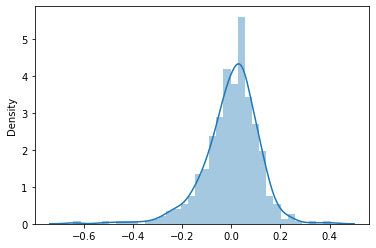

In [97]:
##plotting the residual
sns.distplot(res)
plt.show()

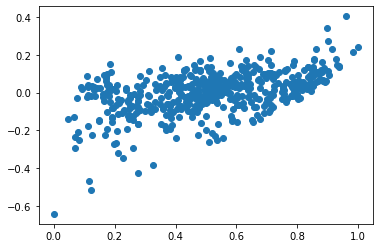

In [98]:
plt.scatter(y_train, res)
plt.show()

# Doing Sepeprately again, using RFE

In [102]:
bike2=bike1.copy()

In [99]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


### Understanding Categorical Variables:

- Season has 4 levels,so we need 3 dummies, dropping off 'season_Winter:
    - 000 indicates winter season
    - 001 indicates summer season
    - 010 indicates spring  season
    - 100 indicates Fall season
 
- Month has 12 levels,so we need 11 dummies, dropping off 'mnth-September'
    - 00000000000 indicates September month 
    - 00000000001 indicates October month
    - 00000000010 indicates November month
    - 00000000100 indicates May month
    - 00000001000 indicates March month
    - 00000010000 indicates June month
    - 00000100000 indicates July month
    - 00001000000 indicates January month
    - 00010000000 indicates February month
    - 00100000000 indicates December month
    - 01000000000 indicates August month
    - 10000000000 indicates April month
   

- There are 3 weather  conditions, so 2 dummy  variable is required. Dropping 'weathersit_Rainy'
    - 00 indicates Rainy weather
    - 01 indicates Mist Weather
    - 10 indicates Cloudy weather
    
- Working day has 2 levels, 1 dummy is needed. Dropping off 'workingday_Non_working day'
    - 0 indicates Non_working day
    - 1 indicates working day
    
- Holiday has 2 levels, 1 dummy is needed. Dropping off 'holiday_Holiday'
    - 0 indicates Holiday
    - 1 indicates Non_Holiday
    
    
- Weekday has 7 levels, 6 dummy can be used, dropping off 'weekday_Wednesday'
    - 000000 indicates wednesday
    - 000001 indicates Tuesday
    - 000010 indicates Thursday
    - 000100 indicates Sunday
    - 001000 indicates Saturday
    - 010000 indicates Monday
    - 100000 indicates Friday

In [103]:
##Mapping the repspective variables in the dataset with respect to the values  mentioned above:
bike1[['season']]=bike1[['season']].apply(lambda x: x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}))
bike1[['mnth']]=bike1[['mnth']].apply(lambda x: x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))
bike1[['weekday']]=bike1[['weekday']].apply(lambda x:x.map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'}))
bike1[['weathersit']]=bike1[['weathersit']].apply(lambda x:x.map({1:'Cloudy',2:'Mist',3:'Rainy'}))   

In [106]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Cloudy,11.46350,43.6957,12.522300,1600


In [108]:
cat_cols1=[]
for i in bike1.columns:
    if bike1[i].dtype not in ('float64','int64'):
        cat_cols1.append(i)
cat_cols1

['season', 'mnth', 'weekday', 'weathersit']

In [109]:
##Now, we would do  one-hot encoding of the categorical values.
status=pd.get_dummies(bike1[cat_cols1])

In [110]:
##Concat
bike1=pd.concat([bike1,status],axis=1)

In [111]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Mist,weathersit_Rainy
0,Spring,0,January,0,Monday,1,Mist,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,Spring,0,January,0,Tuesday,1,Mist,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,Spring,0,January,0,Wednesday,1,Cloudy,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,Spring,0,January,0,Thursday,1,Cloudy,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,Spring,0,January,0,Friday,1,Cloudy,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [112]:
##Dropping of extra columns:
bike1.drop(['season_Winter','mnth_September','weathersit_Rainy','weekday_Wednesday'], axis=1, inplace=True)

In [113]:
bike1.shape

(730, 33)

In [114]:
##Dropping off categorical columns
bike1.drop(cat_cols1, axis=1, inplace=True)

In [159]:
bike1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weathersit_Cloudy,weathersit_Mist
0,0,0,1,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [177]:
##So, the dataset is now ready for modelling, hence splitting the data set into test and train
df_train1, df_test1=train_test_split(bike1, train_size=0.7, random_state=100)

In [178]:
print(df_train1.shape)
print(df_test1.shape)

(510, 29)
(220, 29)


In [179]:
###Scaling
num=['atemp','hum','windspeed','cnt']
df_train1[num]=scaler.fit_transform(df_train1[num])

In [180]:
df_train1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weathersit_Cloudy,weathersit_Mist
576,1,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [181]:
##Seperating X_train and y_train
y_tr=df_train1.pop('cnt')
X_tr=df_train1

In [182]:
from sklearn.feature_selection import RFE

In [183]:
lm=LinearRegression()
lm.fit(X_tr, y_tr)

LinearRegression()

In [184]:
#using RFE for feature seElection
rfe=RFE(lm, 25)
rfe=rfe.fit(X_tr, y_tr)

In [185]:
list(zip(X_tr.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Fall', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('mnth_April', True, 1),
 ('mnth_August', True, 1),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', True, 1),
 ('mnth_March', True, 1),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', True, 1),
 ('weekday_Friday', False, 4),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 3),
 ('weekday_Tuesday', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Mist', True, 1)]

In [186]:
##Features RFE selected
X_train_rfe=X_tr.columns[rfe.support_]

In [187]:
X_train_rfe

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_Fall', 'season_Spring', 'season_Summer', 'mnth_April', 'mnth_August', 'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Tuesday', 'weathersit_Cloudy', 'weathersit_Mist'], dtype='object')

In [188]:
##Features RFE not selected
X_train_notrfe=X_tr.columns[~rfe.support_]

In [189]:
X_train_notrfe

Index(['weekday_Friday', 'weekday_Monday', 'weekday_Thursday'], dtype='object')

In [190]:
##Now let's build a model using all the features that RFE selected.
X_train_rfe=X_tr[X_train_rfe]

In [191]:
X_train_rfe.shape

(510, 25)

In [192]:
##Now lets build the model
X_train_sm1=sm.add_constant(X_train_rfe)

##Least square
lr_1=sm.OLS(y_tr,X_train_sm1)

#Fit the model
lr_model_1=lr_1.fit()

#print summary
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.7
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          4.82e-179
Time:                        01:29:23   Log-Likelihood:                 516.62
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     484   BIC:                            -871.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3575      0.091      3.916      0.000       0.178       0.537
yr                    0.2332      0.008     28.477      0.000       0.217       0.249
holiday              -0.1334      0.066     -2.019      0.044      -0.263      -0.004
workingday           -0.0642      0.072     -0.898      0.370      -0.205       0.076
atemp                 0.4190      0.046      9.162      0.000       0.329       0.509
hum                  -0.1525      0.039     -3.889      0.000      -0.230      -0.075
windspeed            -0.1662      0.026     -6.328      0.000      -0.218      -0.115
season_Fall          -0.1043      0.028     -3.674      0.000      -0.160      -0.049
season_Spring        -0.1559      0.026     -5.895      0.000      -0.208      -0.104
season_Summer        -0.0685      0.030     -2.259      0.024      -0.128      -0.009
mnth_April           -0.0980      0.032     -3.030      0.003      -0.162      -0.034
mnth_August          -0.0538      0.021     -2.614      0.009      -0.094      -0.013
mnth_December        -0.1504      0.031     -4.843      0.000      -0.211      -0.089
mnth_February        -0.1385      0.037     -3.770      0.000      -0.211      -0.066
mnth_January         -0.1696      0.037     -4.545      0.000      -0.243      -0.096
mnth_July            -0.1130      0.023     -5.011      0.000      -0.157      -0.069
mnth_June            -0.0729      0.027     -2.748      0.006      -0.125      -0.021
mnth_March           -0.0958      0.031     -3.057      0.002      -0.157      -0.034
mnth_May             -0.0609      0.032     -1.932      0.054      -0.123       0.001
mnth_November        -0.1425      0.032     -4.513      0.000      -0.205      -0.080
mnth_October         -0.0939      0.030     -3.115      0.002      -0.153      -0.035
weekday_Saturday     -0.0481      0.071     -0.673      0.501      -0.188       0.092
weekday_Sunday       -0.0453      0.071     -0.635      0.526      -0.185       0.095
weekday_Tuesday      -0.0184      0.012     -1.583      0.114      -0.041       0.004
weathersit_Cloudy     0.2482      0.027      9.248      0.000       0.195       0.301
weathersit_Mist       0.1888      0.025      7.437      0.000       0.139       0.239
==============================================================================
Omnibus:                       81.683   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.632
Skew:                          -0.783   Prob(JB):                     2.75e-49
Kurtosis:                       5.841   Cond. No.                         73.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,workingday,82.20
3,atemp,38.56
4,hum,37.29
23,weathersit_Cloudy,24.66
21,weekday_Sunday,16.19
20,weekday_Saturday,15.14
8,season_Summer,13.85
24,weathersit_Mist,12.60
6,season_Fall,12.36
7,season_Spring,10.49


#### Dropping working day,because of high VIF and high P value

In [194]:
##dropping workingday
X_train_rfe1=X_train_rfe.drop('workingday', axis=1)

In [196]:
##Rebuilding the model
X_train_sm2=sm.add_constant(X_train_rfe1)

##Least square
lr_2=sm.OLS(y_tr,X_train_sm2)

#Fit the model
lr_model_2=lr_2.fit()

#print summary
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     111.1
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          6.73e-180
Time:                        01:34:16   Log-Likelihood:                 516.19
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     485   BIC:                            -876.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2919      0.055      5.332      0.000       0.184       0.399
yr                    0.2337      0.008     28.596      0.000       0.218       0.250
holiday              -0.0788      0.026     -3.040      0.002      -0.130      -0.028
atemp                 0.4203      0.046      9.195      0.000       0.330       0.510
hum                  -0.1516      0.039     -3.866      0.000      -0.229      -0.075
windspeed            -0.1670      0.026     -6.360      0.000      -0.219      -0.115
season_Fall          -0.1035      0.028     -3.649      0.000      -0.159      -0.048
season_Spring        -0.1549      0.026     -5.862      0.000      -0.207      -0.103
season_Summer        -0.0677      0.030     -2.232      0.026      -0.127      -0.008
mnth_April           -0.0981      0.032     -3.032      0.003      -0.162      -0.035
mnth_August          -0.0545      0.021     -2.650      0.008      -0.095      -0.014
mnth_December        -0.1498      0.031     -4.826      0.000      -0.211      -0.089
mnth_February        -0.1381      0.037     -3.761      0.000      -0.210      -0.066
mnth_January         -0.1693      0.037     -4.539      0.000      -0.243      -0.096
mnth_July            -0.1137      0.023     -5.044      0.000      -0.158      -0.069
mnth_June            -0.0735      0.027     -2.775      0.006      -0.126      -0.021
mnth_March           -0.0961      0.031     -3.065      0.002      -0.158      -0.034
mnth_May             -0.0615      0.031     -1.953      0.051      -0.123       0.000
mnth_November        -0.1440      0.032     -4.568      0.000      -0.206      -0.082
mnth_October         -0.0934      0.030     -3.099      0.002      -0.153      -0.034
weekday_Saturday      0.0151      0.012      1.221      0.223      -0.009       0.039
weekday_Sunday        0.0178      0.012      1.469      0.142      -0.006       0.042
weekday_Tuesday      -0.0182      0.012     -1.573      0.116      -0.041       0.005
weathersit_Cloudy     0.2480      0.027      9.244      0.000       0.195       0.301
weathersit_Mist       0.1888      0.025      7.440      0.000       0.139       0.239
==============================================================================
Omnibus:                       81.359   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.169
Skew:                          -0.786   Prob(JB):                     2.56e-48
Kurtosis:                       5.801   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,atemp,36.29
3,hum,29.19
22,weathersit_Cloudy,18.03
7,season_Summer,13.44
5,season_Fall,11.19
6,season_Spring,10.39
23,weathersit_Mist,10.26
12,mnth_January,6.27
15,mnth_March,5.13
16,mnth_May,5.12


#### Dropping weekday_Saturday because of high p value

In [198]:
##Dropping weekday_Saturday
X_train_rfe2=X_train_rfe1.drop('weekday_Saturday', axis=1)

In [199]:
##Rebuilding the model
X_train_sm3=sm.add_constant(X_train_rfe2)

##Least square
lr_3=sm.OLS(y_tr,X_train_sm3)

#Fit the model
lr_model_3=lr_3.fit()

#print summary
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          1.29e-180
Time:                        01:38:07   Log-Likelihood:                 515.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     486   BIC:                            -881.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2972      0.055      5.441      0.000       0.190       0.404
yr                    0.2336      0.008     28.567      0.000       0.218       0.250
holiday              -0.0795      0.026     -3.065      0.002      -0.131      -0.029
atemp                 0.4209      0.046      9.204      0.000       0.331       0.511
hum                  -0.1535      0.039     -3.917      0.000      -0.230      -0.077
windspeed            -0.1675      0.026     -6.376      0.000      -0.219      -0.116
season_Fall          -0.1035      0.028     -3.645      0.000      -0.159      -0.048
season_Spring        -0.1539      0.026     -5.826      0.000      -0.206      -0.102
season_Summer        -0.0672      0.030     -2.218      0.027      -0.127      -0.008
mnth_April           -0.0988      0.032     -3.052      0.002      -0.162      -0.035
mnth_August          -0.0545      0.021     -2.648      0.008      -0.095      -0.014
mnth_December        -0.1503      0.031     -4.839      0.000      -0.211      -0.089
mnth_February        -0.1397      0.037     -3.804      0.000      -0.212      -0.068
mnth_January         -0.1703      0.037     -4.566      0.000      -0.244      -0.097
mnth_July            -0.1138      0.023     -5.047      0.000      -0.158      -0.069
mnth_June            -0.0745      0.027     -2.812      0.005      -0.127      -0.022
mnth_March           -0.0968      0.031     -3.089      0.002      -0.158      -0.035
mnth_May             -0.0621      0.031     -1.970      0.049      -0.124      -0.000
mnth_November        -0.1441      0.032     -4.568      0.000      -0.206      -0.082
mnth_October         -0.0937      0.030     -3.109      0.002      -0.153      -0.034
weekday_Sunday        0.0150      0.012      1.261      0.208      -0.008       0.038
weekday_Tuesday      -0.0209      0.011     -1.832      0.068      -0.043       0.002
weathersit_Cloudy     0.2466      0.027      9.196      0.000       0.194       0.299
weathersit_Mist       0.1881      0.025      7.412      0.000       0.138       0.238
==============================================================================
Omnibus:                       80.618   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.873
Skew:                          -0.769   Prob(JB):                     2.44e-49
Kurtosis:                       5.859   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,atemp,36.24
3,hum,29.19
21,weathersit_Cloudy,18.03
7,season_Summer,13.43
5,season_Fall,11.17
6,season_Spring,10.37
22,weathersit_Mist,10.25
12,mnth_January,6.27
15,mnth_March,5.13
16,mnth_May,5.12


### Dropping weekday_Sunday' because of high p value

In [202]:
##Dropping "weekday_sunday"
X_train_rfe3=X_train_rfe2.drop('weekday_Sunday', axis=1)

In [204]:
##Rebuilding the model
X_train_sm4=sm.add_constant(X_train_rfe3)

##Least square
lr_4=sm.OLS(y_tr,X_train_sm4)

#Fit the model
lr_model_4=lr_4.fit()

#print summary
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     120.8
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.55e-181
Time:                        08:45:24   Log-Likelihood:                 514.58
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     487   BIC:                            -885.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2996      0.055      5.486      0.000       0.192       0.407
yr                    0.2337      0.008     28.570      0.000       0.218       0.250
holiday              -0.0799      0.026     -3.080      0.002      -0.131      -0.029
atemp                 0.4215      0.046      9.214      0.000       0.332       0.511
hum                  -0.1558      0.039     -3.978      0.000      -0.233      -0.079
windspeed            -0.1667      0.026     -6.344      0.000      -0.218      -0.115
season_Fall          -0.1033      0.028     -3.637      0.000      -0.159      -0.047
season_Spring        -0.1547      0.026     -5.852      0.000      -0.207      -0.103
season_Summer        -0.0677      0.030     -2.232      0.026      -0.127      -0.008
mnth_April           -0.0987      0.032     -3.048      0.002      -0.162      -0.035
mnth_August          -0.0549      0.021     -2.668      0.008      -0.095      -0.014
mnth_December        -0.1492      0.031     -4.804      0.000      -0.210      -0.088
mnth_February        -0.1388      0.037     -3.779      0.000      -0.211      -0.067
mnth_January         -0.1698      0.037     -4.548      0.000      -0.243      -0.096
mnth_July            -0.1133      0.023     -5.022      0.000      -0.158      -0.069
mnth_June            -0.0746      0.027     -2.813      0.005      -0.127      -0.022
mnth_March           -0.0960      0.031     -3.062      0.002      -0.158      -0.034
mnth_May             -0.0620      0.032     -1.969      0.050      -0.124      -0.000
mnth_November        -0.1449      0.032     -4.594      0.000      -0.207      -0.083
mnth_October         -0.0938      0.030     -3.110      0.002      -0.153      -0.035
weekday_Tuesday      -0.0233      0.011     -2.072      0.039      -0.045      -0.001
weathersit_Cloudy     0.2471      0.027      9.210      0.000       0.194       0.300
weathersit_Mist       0.1898      0.025      7.481      0.000       0.140       0.240
==============================================================================
Omnibus:                       76.900   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.447
Skew:                          -0.729   Prob(JB):                     9.98e-48
Kurtosis:                       5.839   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,atemp,36.22
3,hum,29.16
20,weathersit_Cloudy,17.99
7,season_Summer,13.43
5,season_Fall,11.17
6,season_Spring,10.37
21,weathersit_Mist,10.19
12,mnth_January,6.26
16,mnth_May,5.12
15,mnth_March,5.12


In [206]:
##Removing a temp because of  high VIF value
X_train_rfe4=X_train_rfe3.drop('atemp', axis=1)

In [207]:
##Rebuilding the model
X_train_sm5=sm.add_constant(X_train_rfe4)

##Least square
lr_5=sm.OLS(y_tr,X_train_sm5)

#Fit the model
lr_model_5=lr_5.fit()

#print summary
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     104.6
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          1.76e-165
Time:                        08:49:23   Log-Likelihood:                 473.60
No. Observations:                 510   AIC:                            -903.2
Df Residuals:                     488   BIC:                            -810.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4613      0.056      8.240      0.000       0.351       0.571
yr                    0.2453      0.009     28.038      0.000       0.228       0.263
holiday              -0.0700      0.028     -2.493      0.013      -0.125      -0.015
hum                  -0.0586      0.041     -1.436      0.152      -0.139       0.022
windspeed            -0.1770      0.028     -6.228      0.000      -0.233      -0.121
season_Fall          -0.0841      0.031     -2.742      0.006      -0.144      -0.024
season_Spring        -0.1665      0.029     -5.826      0.000      -0.223      -0.110
season_Summer        -0.0815      0.033     -2.486      0.013      -0.146      -0.017
mnth_April           -0.1323      0.035     -3.798      0.000      -0.201      -0.064
mnth_August          -0.0208      0.022     -0.949      0.343      -0.064       0.022
mnth_December        -0.2659      0.031     -8.659      0.000      -0.326      -0.206
mnth_February        -0.2609      0.037     -7.032      0.000      -0.334      -0.188
mnth_January         -0.3246      0.036     -8.994      0.000      -0.395      -0.254
mnth_July            -0.0487      0.023     -2.097      0.037      -0.094      -0.003
mnth_June            -0.0216      0.028     -0.770      0.442      -0.077       0.033
mnth_March           -0.1668      0.033     -5.069      0.000      -0.231      -0.102
mnth_May             -0.0467      0.034     -1.370      0.171      -0.114       0.020
mnth_November        -0.2404      0.032     -7.452      0.000      -0.304      -0.177
mnth_October         -0.1399      0.032     -4.346      0.000      -0.203      -0.077
weekday_Tuesday      -0.0240      0.012     -1.971      0.049      -0.048   -6.97e-05
weathersit_Cloudy     0.2843      0.029      9.900      0.000       0.228       0.341
weathersit_Mist       0.2084      0.027      7.611      0.000       0.155       0.262
==============================================================================
Omnibus:                       76.070   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.078
Skew:                          -0.658   Prob(JB):                     3.35e-57
Kurtosis:                       6.241   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,hum,19.52
19,weathersit_Cloudy,14.28
6,season_Summer,13.42
4,season_Fall,10.57
5,season_Spring,10.37
20,weathersit_Mist,9.25
11,mnth_January,5.43
15,mnth_May,5.06
3,windspeed,5.03
14,mnth_March,5.03


In [209]:
###removing mnth_June because of  high p value
X_train_rfe5=X_train_rfe4.drop('mnth_June', axis=1)

In [210]:
##Rebuilding the model
X_train_sm6=sm.add_constant(X_train_rfe5)

##Least square
lr_6=sm.OLS(y_tr,X_train_sm6)

#Fit the model
lr_model_6=lr_6.fit()

#print summary
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     109.9
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.22e-166
Time:                        08:55:20   Log-Likelihood:                 473.29
No. Observations:                 510   AIC:                            -904.6
Df Residuals:                     489   BIC:                            -815.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4517      0.055      8.279      0.000       0.345       0.559
yr                    0.2453      0.009     28.046      0.000       0.228       0.262
holiday              -0.0684      0.028     -2.444      0.015      -0.123      -0.013
hum                  -0.0547      0.040     -1.350      0.178      -0.134       0.025
windspeed            -0.1765      0.028     -6.216      0.000      -0.232      -0.121
season_Fall          -0.0838      0.031     -2.736      0.006      -0.144      -0.024
season_Spring        -0.1731      0.027     -6.350      0.000      -0.227      -0.120
season_Summer        -0.0936      0.029     -3.255      0.001      -0.150      -0.037
mnth_April           -0.1131      0.024     -4.659      0.000      -0.161      -0.065
mnth_August          -0.0142      0.020     -0.703      0.482      -0.054       0.025
mnth_December        -0.2571      0.028     -9.023      0.000      -0.313      -0.201
mnth_February        -0.2472      0.033     -7.594      0.000      -0.311      -0.183
mnth_January         -0.3110      0.031     -9.880      0.000      -0.373      -0.249
mnth_July            -0.0418      0.021     -1.952      0.052      -0.084       0.000
mnth_March           -0.1512      0.026     -5.846      0.000      -0.202      -0.100
mnth_May             -0.0279      0.024     -1.172      0.242      -0.075       0.019
mnth_November        -0.2336      0.031     -7.532      0.000      -0.295      -0.173
mnth_October         -0.1334      0.031     -4.298      0.000      -0.194      -0.072
weekday_Tuesday      -0.0242      0.012     -1.989      0.047      -0.048      -0.000
weathersit_Cloudy     0.2841      0.029      9.899      0.000       0.228       0.341
weathersit_Mist       0.2084      0.027      7.617      0.000       0.155       0.262
==============================================================================
Omnibus:                       76.226   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.557
Skew:                          -0.658   Prob(JB):                     1.60e-57
Kurtosis:                       6.252   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,hum,19.48
18,weathersit_Cloudy,13.53
4,season_Fall,10.46
6,season_Summer,9.21
5,season_Spring,9.14
19,weathersit_Mist,9.03
3,windspeed,5.01
11,mnth_January,4.33
15,mnth_November,3.50
16,mnth_October,3.49


In [216]:
###Dropping mnth_August because of  high p value
X_train_rfe6=X_train_rfe5.drop('mnth_August', axis=1)

In [217]:
##Rebuilding the model
X_train_sm7=sm.add_constant(X_train_rfe6)

##Least square
lr_7=sm.OLS(y_tr,X_train_sm7)

#Fit the model
lr_model_7=lr_7.fit()

#print summary
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.60e-167
Time:                        09:03:58   Log-Likelihood:                 473.04
No. Observations:                 510   AIC:                            -906.1
Df Residuals:                     490   BIC:                            -821.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4531      0.055      8.312      0.000       0.346       0.560
yr                    0.2451      0.009     28.053      0.000       0.228       0.262
holiday              -0.0672      0.028     -2.408      0.016      -0.122      -0.012
hum                  -0.0548      0.040     -1.354      0.176      -0.134       0.025
windspeed            -0.1766      0.028     -6.223      0.000      -0.232      -0.121
season_Fall          -0.0912      0.029     -3.169      0.002      -0.148      -0.035
season_Spring        -0.1731      0.027     -6.355      0.000      -0.227      -0.120
season_Summer        -0.0937      0.029     -3.258      0.001      -0.150      -0.037
mnth_April           -0.1131      0.024     -4.663      0.000      -0.161      -0.065
mnth_December        -0.2572      0.028     -9.030      0.000      -0.313      -0.201
mnth_February        -0.2473      0.033     -7.601      0.000      -0.311      -0.183
mnth_January         -0.3110      0.031     -9.886      0.000      -0.373      -0.249
mnth_July            -0.0345      0.019     -1.842      0.066      -0.071       0.002
mnth_March           -0.1512      0.026     -5.849      0.000      -0.202      -0.100
mnth_May             -0.0279      0.024     -1.172      0.242      -0.075       0.019
mnth_November        -0.2338      0.031     -7.542      0.000      -0.295      -0.173
mnth_October         -0.1336      0.031     -4.306      0.000      -0.195      -0.073
weekday_Tuesday      -0.0239      0.012     -1.969      0.050      -0.048   -4.98e-05
weathersit_Cloudy     0.2831      0.029      9.881      0.000       0.227       0.339
weathersit_Mist       0.2072      0.027      7.592      0.000       0.154       0.261
==============================================================================
Omnibus:                       76.416   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.016
Skew:                          -0.659   Prob(JB):                     7.70e-58
Kurtosis:                       6.262   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,hum,19.47
17,weathersit_Cloudy,13.51
6,season_Summer,9.21
5,season_Spring,9.14
4,season_Fall,9.06
18,weathersit_Mist,9.00
3,windspeed,5.01
10,mnth_January,4.33
14,mnth_November,3.50
15,mnth_October,3.49


#### Dropping 'mnth_May' becaise of high p value

In [220]:
X_train_rfe7=X_train_rfe6.drop('mnth_May', axis=1)

In [221]:
##Rebuilding the model
X_train_sm8=sm.add_constant(X_train_rfe7)

##Least square
lr_8=sm.OLS(y_tr,X_train_sm8)

#Fit the model
lr_model_8=lr_8.fit()

#print summary
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     122.0
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          4.57e-168
Time:                        08:23:10   Log-Likelihood:                 472.32
No. Observations:                 510   AIC:                            -906.6
Df Residuals:                     491   BIC:                            -826.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4511      0.055      8.278      0.000       0.344       0.558
yr                    0.2452      0.009     28.062      0.000       0.228       0.262
holiday              -0.0669      0.028     -2.396      0.017      -0.122      -0.012
hum                  -0.0593      0.040     -1.472      0.142      -0.139       0.020
windspeed            -0.1770      0.028     -6.235      0.000      -0.233      -0.121
season_Fall          -0.0853      0.028     -3.008      0.003      -0.141      -0.030
season_Spring        -0.1794      0.027     -6.713      0.000      -0.232      -0.127
season_Summer        -0.1045      0.027     -3.834      0.000      -0.158      -0.051
mnth_April           -0.0967      0.020     -4.876      0.000      -0.136      -0.058
mnth_December        -0.2493      0.028     -9.004      0.000      -0.304      -0.195
mnth_February        -0.2355      0.031     -7.609      0.000      -0.296      -0.175
mnth_January         -0.2990      0.030    -10.046      0.000      -0.358      -0.241
mnth_July            -0.0347      0.019     -1.854      0.064      -0.072       0.002
mnth_March           -0.1376      0.023     -5.952      0.000      -0.183      -0.092
mnth_November        -0.2280      0.031     -7.448      0.000      -0.288      -0.168
mnth_October         -0.1274      0.031     -4.167      0.000      -0.188      -0.067
weekday_Tuesday      -0.0237      0.012     -1.954      0.051      -0.048       0.000
weathersit_Cloudy     0.2821      0.029      9.847      0.000       0.226       0.338
weathersit_Mist       0.2063      0.027      7.558      0.000       0.153       0.260
==============================================================================
Omnibus:                       75.985   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.021
Skew:                          -0.653   Prob(JB):                     7.69e-58
Kurtosis:                       6.267   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
2,hum,18.93
16,weathersit_Cloudy,13.44
17,weathersit_Mist,8.97
4,season_Fall,8.75
5,season_Spring,8.74
6,season_Summer,8.00
3,windspeed,5.01
10,mnth_January,3.86
13,mnth_November,3.41
14,mnth_October,3.38


#### Dropping 'hum'  because of high p and high VIF

In [223]:
X_train_rfe8=X_train_rfe7.drop('hum', axis=1)

In [225]:
##Rebuilding the model
X_train_sm9=sm.add_constant(X_train_rfe8)

##Least square
lr_9=sm.OLS(y_tr,X_train_sm9)

#Fit the model
lr_model_9=lr_9.fit()

#print summary
lr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.16e-168
Time:                        08:26:06   Log-Likelihood:                 471.20
No. Observations:                 510   AIC:                            -906.4
Df Residuals:                     492   BIC:                            -830.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3939      0.038     10.304      0.000       0.319       0.469
yr                    0.2462      0.009     28.230      0.000       0.229       0.263
holiday              -0.0676      0.028     -2.416      0.016      -0.123      -0.013
windspeed            -0.1655      0.027     -6.057      0.000      -0.219      -0.112
season_Fall          -0.0843      0.028     -2.970      0.003      -0.140      -0.029
season_Spring        -0.1782      0.027     -6.663      0.000      -0.231      -0.126
season_Summer        -0.1043      0.027     -3.823      0.000      -0.158      -0.051
mnth_April           -0.0924      0.020     -4.703      0.000      -0.131      -0.054
mnth_December        -0.2486      0.028     -8.969      0.000      -0.303      -0.194
mnth_February        -0.2314      0.031     -7.499      0.000      -0.292      -0.171
mnth_January         -0.2957      0.030     -9.951      0.000      -0.354      -0.237
mnth_July            -0.0332      0.019     -1.772      0.077      -0.070       0.004
mnth_March           -0.1341      0.023     -5.825      0.000      -0.179      -0.089
mnth_November        -0.2259      0.031     -7.379      0.000      -0.286      -0.166
mnth_October         -0.1282      0.031     -4.187      0.000      -0.188      -0.068
weekday_Tuesday      -0.0252      0.012     -2.083      0.038      -0.049      -0.001
weathersit_Cloudy     0.2983      0.026     11.267      0.000       0.246       0.350
weathersit_Mist       0.2133      0.027      7.926      0.000       0.160       0.266
==============================================================================
Omnibus:                       77.246   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.876
Skew:                          -0.669   Prob(JB):                     5.01e-58
Kurtosis:                       6.260   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
15,weathersit_Cloudy,12.57
4,season_Spring,8.36
16,weathersit_Mist,7.27
3,season_Fall,6.49
5,season_Summer,6.18
2,windspeed,5.00
9,mnth_January,3.73
8,mnth_February,3.06
12,mnth_November,2.71
11,mnth_March,2.53


#### Dropping 'mnth_July' because of high p

In [227]:
X_train_rfe9=X_train_rfe8.drop('mnth_July', axis=1)

In [228]:
##Rebuilding the model
X_train_sm10=sm.add_constant(X_train_rfe9)

##Least square
lr_10=sm.OLS(y_tr,X_train_sm10)

#Fit the model
lr_model_10=lr_10.fit()

#print summary
lr_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          4.63e-169
Time:                        08:29:12   Log-Likelihood:                 469.58
No. Observations:                 510   AIC:                            -905.2
Df Residuals:                     493   BIC:                            -833.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3938      0.038     10.281      0.000       0.319       0.469
yr                    0.2463      0.009     28.182      0.000       0.229       0.263
holiday              -0.0657      0.028     -2.346      0.019      -0.121      -0.011
windspeed            -0.1657      0.027     -6.054      0.000      -0.220      -0.112
season_Fall          -0.0939      0.028     -3.368      0.001      -0.149      -0.039
season_Spring        -0.1781      0.027     -6.646      0.000      -0.231      -0.125
season_Summer        -0.1044      0.027     -3.820      0.000      -0.158      -0.051
mnth_April           -0.0922      0.020     -4.686      0.000      -0.131      -0.054
mnth_December        -0.2487      0.028     -8.956      0.000      -0.303      -0.194
mnth_February        -0.2315      0.031     -7.487      0.000      -0.292      -0.171
mnth_January         -0.2961      0.030     -9.942      0.000      -0.355      -0.238
mnth_March           -0.1342      0.023     -5.814      0.000      -0.180      -0.089
mnth_November        -0.2260      0.031     -7.368      0.000      -0.286      -0.166
mnth_October         -0.1283      0.031     -4.181      0.000      -0.189      -0.068
weekday_Tuesday      -0.0266      0.012     -2.197      0.028      -0.050      -0.003
weathersit_Cloudy     0.2981      0.027     11.235      0.000       0.246       0.350
weathersit_Mist       0.2146      0.027      7.960      0.000       0.162       0.268
==============================================================================
Omnibus:                       78.345   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.638
Skew:                          -0.686   Prob(JB):                     9.31e-58
Kurtosis:                       6.237   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe9.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
14,weathersit_Cloudy,12.56
4,season_Spring,8.36
15,weathersit_Mist,7.26
5,season_Summer,6.18
3,season_Fall,6.07
2,windspeed,5.00
9,mnth_January,3.73
8,mnth_February,3.06
11,mnth_November,2.71
10,mnth_March,2.53


#### Dropping 'weathersit_Cloudy' because of high VIF

In [230]:
X_train_rfe10=X_train_rfe9.drop('weathersit_Cloudy', axis=1)

In [231]:
##Rebuilding the model
X_train_sm11=sm.add_constant(X_train_rfe10)

##Least square
lr_11=sm.OLS(y_tr,X_train_sm11)

#Fit the model
lr_model_11=lr_11.fit()

#print summary
lr_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          7.30e-146
Time:                        08:34:10   Log-Likelihood:                 411.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     494   BIC:                            -723.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6866      0.031     21.839      0.000       0.625       0.748
yr                  0.2521      0.010     25.813      0.000       0.233       0.271
holiday            -0.0542      0.031     -1.730      0.084      -0.116       0.007
windspeed          -0.1934      0.031     -6.335      0.000      -0.253      -0.133
season_Fall        -0.0960      0.031     -3.074      0.002      -0.157      -0.035
season_Spring      -0.1630      0.030     -5.439      0.000      -0.222      -0.104
season_Summer      -0.0997      0.031     -3.259      0.001      -0.160      -0.040
mnth_April         -0.0966      0.022     -4.382      0.000      -0.140      -0.053
mnth_December      -0.2558      0.031     -8.227      0.000      -0.317      -0.195
mnth_February      -0.2478      0.035     -7.166      0.000      -0.316      -0.180
mnth_January       -0.3071      0.033     -9.216      0.000      -0.373      -0.242
mnth_March         -0.1497      0.026     -5.802      0.000      -0.200      -0.099
mnth_November      -0.2345      0.034     -6.831      0.000      -0.302      -0.167
mnth_October       -0.1583      0.034     -4.624      0.000      -0.225      -0.091
weekday_Tuesday    -0.0197      0.014     -1.451      0.147      -0.046       0.007
weathersit_Mist    -0.0701      0.010     -6.800      0.000      -0.090      -0.050
==============================================================================
Omnibus:                      130.814   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.320
Skew:                          -1.109   Prob(JB):                    7.63e-113
Kurtosis:                       7.402   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe10.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
4,season_Spring,7.17
2,windspeed,4.97
9,mnth_January,3.47
8,mnth_February,2.89
5,season_Summer,2.83
10,mnth_March,2.43
3,season_Fall,2.06
0,yr,1.98
6,mnth_April,1.61
14,weathersit_Mist,1.52


#### Dropping 'weekday_Tuesday' because oh high p value

In [233]:
X_train_rfe11=X_train_rfe10.drop('weekday_Tuesday', axis=1)

In [234]:
##Rebuilding the model
X_train_sm12=sm.add_constant(X_train_rfe11)

##Least square
lr_12=sm.OLS(y_tr,X_train_sm12)

#Fit the model
lr_model_12=lr_12.fit()

#print summary
lr_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.88e-146
Time:                        08:37:30   Log-Likelihood:                 410.36
No. Observations:                 510   AIC:                            -790.7
Df Residuals:                     495   BIC:                            -727.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6823      0.031     21.775      0.000       0.621       0.744
yr                  0.2518      0.010     25.756      0.000       0.233       0.271
holiday            -0.0557      0.031     -1.777      0.076      -0.117       0.006
windspeed          -0.1949      0.031     -6.380      0.000      -0.255      -0.135
season_Fall        -0.0937      0.031     -3.002      0.003      -0.155      -0.032
season_Spring      -0.1614      0.030     -5.383      0.000      -0.220      -0.102
season_Summer      -0.0977      0.031     -3.192      0.002      -0.158      -0.038
mnth_April         -0.0969      0.022     -4.393      0.000      -0.140      -0.054
mnth_December      -0.2541      0.031     -8.170      0.000      -0.315      -0.193
mnth_February      -0.2478      0.035     -7.157      0.000      -0.316      -0.180
mnth_January       -0.3063      0.033     -9.185      0.000      -0.372      -0.241
mnth_March         -0.1492      0.026     -5.777      0.000      -0.200      -0.098
mnth_November      -0.2331      0.034     -6.783      0.000      -0.301      -0.166
mnth_October       -0.1570      0.034     -4.584      0.000      -0.224      -0.090
weathersit_Mist    -0.0700      0.010     -6.779      0.000      -0.090      -0.050
==============================================================================
Omnibus:                      132.186   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.112
Skew:                          -1.109   Prob(JB):                    3.16e-118
Kurtosis:                       7.533   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe11.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe11.values, i) for i in range(X_train_rfe11.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
4,season_Spring,7.17
2,windspeed,4.95
9,mnth_January,3.47
8,mnth_February,2.89
5,season_Summer,2.82
10,mnth_March,2.43
3,season_Fall,2.05
0,yr,1.97
6,mnth_April,1.61
13,weathersit_Mist,1.52


#### Dropping 'holiday' because of high p

In [236]:
X_train_rfe12=X_train_rfe11.drop('holiday', axis=1)

In [237]:
##Rebuilding the model
X_train_sm13=sm.add_constant(X_train_rfe12)

##Least square
lr_13=sm.OLS(y_tr,X_train_sm13)

#Fit the model
lr_model_13=lr_13.fit()

#print summary
lr_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          7.88e-147
Time:                        08:42:02   Log-Likelihood:                 408.74
No. Observations:                 510   AIC:                            -789.5
Df Residuals:                     496   BIC:                            -730.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6834      0.031     21.767      0.000       0.622       0.745
yr                  0.2519      0.010     25.717      0.000       0.233       0.271
windspeed          -0.1948      0.031     -6.364      0.000      -0.255      -0.135
season_Fall        -0.0960      0.031     -3.069      0.002      -0.157      -0.035
season_Spring      -0.1641      0.030     -5.469      0.000      -0.223      -0.105
season_Summer      -0.0993      0.031     -3.240      0.001      -0.160      -0.039
mnth_April         -0.0981      0.022     -4.439      0.000      -0.141      -0.055
mnth_December      -0.2560      0.031     -8.218      0.000      -0.317      -0.195
mnth_February      -0.2498      0.035     -7.201      0.000      -0.318      -0.182
mnth_January       -0.3076      0.033     -9.204      0.000      -0.373      -0.242
mnth_March         -0.1482      0.026     -5.730      0.000      -0.199      -0.097
mnth_November      -0.2395      0.034     -6.995      0.000      -0.307      -0.172
mnth_October       -0.1597      0.034     -4.658      0.000      -0.227      -0.092
weathersit_Mist    -0.0693      0.010     -6.705      0.000      -0.090      -0.049
==============================================================================
Omnibus:                      134.355   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.599
Skew:                          -1.128   Prob(JB):                    2.75e-120
Kurtosis:                       7.563   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe12.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe12.values, i) for i in range(X_train_rfe12.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
3,season_Spring,7.16
1,windspeed,4.95
8,mnth_January,3.47
7,mnth_February,2.89
4,season_Summer,2.82
9,mnth_March,2.43
2,season_Fall,2.04
0,yr,1.97
5,mnth_April,1.61
12,weathersit_Mist,1.52


#### Dropping 'season_Spring'  because of high VIF

In [239]:
X_train_rfe13=X_train_rfe12.drop('season_Spring', axis=1)

In [240]:
##Rebuilding the model
X_train_sm14=sm.add_constant(X_train_rfe13)

##Least square
lr_14=sm.OLS(y_tr,X_train_sm14)

#Fit the model
lr_model_14=lr_14.fit()

#print summary
lr_model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.26e-141
Time:                        08:46:43   Log-Likelihood:                 393.81
No. Observations:                 510   AIC:                            -761.6
Df Residuals:                     497   BIC:                            -706.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6023      0.028     21.156      0.000       0.546       0.658
yr                  0.2540      0.010     25.224      0.000       0.234       0.274
windspeed          -0.2178      0.031     -6.982      0.000      -0.279      -0.156
season_Fall        -0.0106      0.028     -0.380      0.704      -0.065       0.044
season_Summer      -0.0021      0.026     -0.081      0.935      -0.053       0.048
mnth_April         -0.1065      0.023     -4.695      0.000      -0.151      -0.062
mnth_December      -0.2198      0.031     -7.018      0.000      -0.281      -0.158
mnth_February      -0.3252      0.033     -9.935      0.000      -0.390      -0.261
mnth_January       -0.3852      0.031    -12.377      0.000      -0.446      -0.324
mnth_March         -0.2000      0.025     -8.074      0.000      -0.249      -0.151
mnth_November      -0.1527      0.031     -4.893      0.000      -0.214      -0.091
mnth_October       -0.0734      0.031     -2.343      0.020      -0.135      -0.012
weathersit_Mist    -0.0669      0.011     -6.301      0.000      -0.088      -0.046
==============================================================================
Omnibus:                      120.803   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.330
Skew:                          -1.058   Prob(JB):                     4.37e-93
Kurtosis:                       6.942   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe13.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe13.values, i) for i in range(X_train_rfe13.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,4.57
3,season_Summer,2.40
0,yr,1.96
2,season_Fall,1.96
4,mnth_April,1.59
11,weathersit_Mist,1.52
7,mnth_January,1.45
6,mnth_February,1.44
8,mnth_March,1.44
9,mnth_November,1.41


#### Dropping 'season_Summer' because of high p value

In [242]:
X_train_rfe14=X_train_rfe13.drop('season_Summer', axis=1)

In [243]:
##Rebuilding the model
X_train_sm15=sm.add_constant(X_train_rfe14)

##Least square
lr_15=sm.OLS(y_tr,X_train_sm15)

#Fit the model
lr_model_15=lr_15.fit()

#print summary
lr_model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.06e-142
Time:                        08:54:02   Log-Likelihood:                 393.80
No. Observations:                 510   AIC:                            -763.6
Df Residuals:                     498   BIC:                            -712.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6005      0.017     34.700      0.000       0.566       0.634
yr                  0.2540      0.010     25.262      0.000       0.234       0.274
windspeed          -0.2178      0.031     -6.990      0.000      -0.279      -0.157
season_Fall        -0.0088      0.016     -0.539      0.590      -0.041       0.023
mnth_April         -0.1067      0.022     -4.753      0.000      -0.151      -0.063
mnth_December      -0.2179      0.022    -10.111      0.000      -0.260      -0.176
mnth_February      -0.3234      0.024    -13.730      0.000      -0.370      -0.277
mnth_January       -0.3834      0.021    -18.039      0.000      -0.425      -0.342
mnth_March         -0.1989      0.021     -9.574      0.000      -0.240      -0.158
mnth_November      -0.1509      0.021     -7.043      0.000      -0.193      -0.109
mnth_October       -0.0715      0.022     -3.319      0.001      -0.114      -0.029
weathersit_Mist    -0.0670      0.011     -6.313      0.000      -0.088      -0.046
==============================================================================
Omnibus:                      120.833   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.944
Skew:                          -1.058   Prob(JB):                     5.30e-93
Kurtosis:                       6.939   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe14.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe14.values, i) for i in range(X_train_rfe14.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,3.59
0,yr,1.87
2,season_Fall,1.64
10,weathersit_Mist,1.44
7,mnth_March,1.43
3,mnth_April,1.41
5,mnth_February,1.30
6,mnth_January,1.30
8,mnth_November,1.27
9,mnth_October,1.25


#### Dropping 'season_Fall' as high p value

In [245]:
X_train_rfe15=X_train_rfe14.drop('season_Fall', axis=1)

In [246]:
##Rebuilding the model
X_train_sm16=sm.add_constant(X_train_rfe15)

##Least square
lr_16=sm.OLS(y_tr,X_train_sm16)

#Fit the model
lr_model_16=lr_16.fit()

#print summary
lr_model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          9.68e-144
Time:                        08:57:16   Log-Likelihood:                 393.66
No. Observations:                 510   AIC:                            -765.3
Df Residuals:                     499   BIC:                            -718.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5945      0.013     44.615      0.000       0.568       0.621
yr                  0.2539      0.010     25.274      0.000       0.234       0.274
windspeed          -0.2167      0.031     -6.975      0.000      -0.278      -0.156
mnth_April         -0.1013      0.020     -5.049      0.000      -0.141      -0.062
mnth_December      -0.2124      0.019    -11.211      0.000      -0.250      -0.175
mnth_February      -0.3179      0.021    -14.943      0.000      -0.360      -0.276
mnth_January       -0.3779      0.019    -20.241      0.000      -0.415      -0.341
mnth_March         -0.1935      0.018    -10.658      0.000      -0.229      -0.158
mnth_November      -0.1454      0.019     -7.729      0.000      -0.182      -0.108
mnth_October       -0.0660      0.019     -3.482      0.001      -0.103      -0.029
weathersit_Mist    -0.0665      0.011     -6.294      0.000      -0.087      -0.046
==============================================================================
Omnibus:                      120.854   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.611
Skew:                          -1.059   Prob(JB):                     6.26e-93
Kurtosis:                       6.937   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=X_train_rfe15.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe15.values, i) for i in range(X_train_rfe15.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,2.89
0,yr,1.71
9,weathersit_Mist,1.41
6,mnth_March,1.27
2,mnth_April,1.26
4,mnth_February,1.19
5,mnth_January,1.19
7,mnth_November,1.17
8,mnth_October,1.16
3,mnth_December,1.14


## Checking the model by adding/removing some variable

In [272]:
checkmod=pd.concat([X_train_rfe15,df_train1.loc[:,['atemp']]],axis=1)

In [273]:
checkmod.head()

,yr,windspeed,mnth_April,mnth_December,mnth_February,mnth_January,mnth_March,mnth_November,mnth_October,weathersit_Mist,atemp
576,1,0.264686,0,0,0,0,0,0,0,0,0.766351
426,1,0.255342,0,0,0,0,1,0,0,1,0.438975
728,1,0.663106,0,1,0,0,0,0,0,0,0.200348
482,1,0.188475,1,0,0,0,0,0,0,1,0.391735
111,0,0.380981,1,0,0,0,0,0,0,1,0.318819


In [274]:
##Rebuilding the model
X_train_check=sm.add_constant(checkmod)

##Least square
lr_check=sm.OLS(y_tr,X_train_check)

#Fit the model
lr_model_check=lr_check.fit()

#print summary
lr_model_check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     152.1
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          2.39e-151
Time:                        09:19:44   Log-Likelihood:                 414.30
No. Observations:                 510   AIC:                            -804.6
Df Residuals:                     498   BIC:                            -753.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3671      0.037      9.825      0.000       0.294       0.440
yr                  0.2454      0.010     25.176      0.000       0.226       0.265
windspeed          -0.1917      0.030     -6.364      0.000      -0.251      -0.133
mnth_April         -0.0324      0.022     -1.472      0.142      -0.076       0.011
mnth_December      -0.0937      0.026     -3.627      0.000      -0.144      -0.043
mnth_February      -0.1846      0.029     -6.363      0.000      -0.242      -0.128
mnth_January       -0.2215      0.030     -7.362      0.000      -0.281      -0.162
mnth_March         -0.0980      0.023     -4.293      0.000      -0.143      -0.053
mnth_November      -0.0441      0.024     -1.845      0.066      -0.091       0.003
mnth_October       -0.0037      0.021     -0.181      0.856      -0.044       0.037
weathersit_Mist    -0.0598      0.010     -5.858      0.000      -0.080      -0.040
atemp               0.3118      0.048      6.481      0.000       0.217       0.406
==============================================================================
Omnibus:                      123.388   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.283
Skew:                          -1.104   Prob(JB):                     3.63e-89
Kurtosis:                       6.780   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=checkmod.columns
vif['VIF']=[variance_inflation_factor(checkmod.values, i) for i in range(checkmod.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,4.55
10,atemp,3.62
0,yr,2.08
9,weathersit_Mist,1.50
6,mnth_March,1.31
5,mnth_January,1.29
2,mnth_April,1.28
4,mnth_February,1.27
7,mnth_November,1.18
8,mnth_October,1.16


#### Removing 'mnth_October' as high p

In [277]:
checkmod1=checkmod.drop('mnth_October', axis=1)

In [278]:
##Rebuilding the model
X_train_check1=sm.add_constant(checkmod1)

##Least square
lr_check1=sm.OLS(y_tr,X_train_check1)

#Fit the model
lr_model_check1=lr_check1.fit()

#print summary
lr_model_check1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     167.6
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.83e-152
Time:                        09:23:55   Log-Likelihood:                 414.29
No. Observations:                 510   AIC:                            -806.6
Df Residuals:                     499   BIC:                            -760.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3637      0.032     11.266      0.000       0.300       0.427
yr                  0.2453      0.010     25.208      0.000       0.226       0.264
windspeed          -0.1916      0.030     -6.369      0.000      -0.251      -0.133
mnth_April         -0.0310      0.021     -1.508      0.132      -0.071       0.009
mnth_December      -0.0916      0.023     -3.950      0.000      -0.137      -0.046
mnth_February      -0.1823      0.026     -6.973      0.000      -0.234      -0.131
mnth_January       -0.2189      0.027     -8.244      0.000      -0.271      -0.167
mnth_March         -0.0962      0.021     -4.668      0.000      -0.137      -0.056
mnth_November      -0.0423      0.022     -1.953      0.051      -0.085       0.000
weathersit_Mist    -0.0598      0.010     -5.861      0.000      -0.080      -0.040
atemp               0.3158      0.043      7.429      0.000       0.232       0.399
==============================================================================
Omnibus:                      124.502   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.947
Skew:                          -1.112   Prob(JB):                     1.30e-90
Kurtosis:                       6.812   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=checkmod1.columns
vif['VIF']=[variance_inflation_factor(checkmod1.values, i) for i in range(checkmod1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,4.37
9,atemp,3.62
0,yr,2.08
8,weathersit_Mist,1.49
5,mnth_January,1.27
6,mnth_March,1.27
2,mnth_April,1.25
4,mnth_February,1.24
7,mnth_November,1.16
3,mnth_December,1.14


#### removing 'mnth_April' as high p

In [280]:
checkmod2=checkmod1.drop('mnth_April', axis=1)

In [281]:
##Rebuilding the model
X_train_check2=sm.add_constant(checkmod2)

##Least square
lr_check2=sm.OLS(y_tr,X_train_check2)

#Fit the model
lr_model_check2=lr_check2.fit()

#print summary
lr_model_check2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     185.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          4.04e-153
Time:                        09:25:52   Log-Likelihood:                 413.13
No. Observations:                 510   AIC:                            -806.3
Df Residuals:                     500   BIC:                            -763.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3461      0.030     11.484      0.000       0.287       0.405
yr                  0.2440      0.010     25.143      0.000       0.225       0.263
windspeed          -0.1987      0.030     -6.675      0.000      -0.257      -0.140
mnth_December      -0.0797      0.022     -3.651      0.000      -0.123      -0.037
mnth_February      -0.1682      0.024     -6.882      0.000      -0.216      -0.120
mnth_January       -0.2037      0.025     -8.283      0.000      -0.252      -0.155
mnth_March         -0.0852      0.019     -4.415      0.000      -0.123      -0.047
mnth_November      -0.0314      0.020     -1.535      0.125      -0.071       0.009
weathersit_Mist    -0.0592      0.010     -5.802      0.000      -0.079      -0.039
atemp               0.3404      0.039      8.654      0.000       0.263       0.418
==============================================================================
Omnibus:                      117.334   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.150
Skew:                          -1.063   Prob(JB):                     1.54e-81
Kurtosis:                       6.605   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=checkmod2.columns
vif['VIF']=[variance_inflation_factor(checkmod2.values, i) for i in range(checkmod2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,3.85
8,atemp,3.55
0,yr,2.05
7,weathersit_Mist,1.48
4,mnth_January,1.22
5,mnth_March,1.22
3,mnth_February,1.20
6,mnth_November,1.13
2,mnth_December,1.11


In [283]:
##Dropping 'mnth_November' as high p
checkmod3=checkmod2.drop('mnth_November', axis=1)

In [284]:
##Rebuilding the model
X_train_check3=sm.add_constant(checkmod3)

##Least square
lr_check3=sm.OLS(y_tr,X_train_check3)

#Fit the model
lr_model_check3=lr_check3.fit()

#print summary
lr_model_check3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     207.8
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          8.75e-154
Time:                        09:30:32   Log-Likelihood:                 411.93
No. Observations:                 510   AIC:                            -805.9
Df Residuals:                     501   BIC:                            -767.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3219      0.026     12.509      0.000       0.271       0.372
yr                  0.2435      0.010     25.074      0.000       0.224       0.263
windspeed          -0.1951      0.030     -6.567      0.000      -0.254      -0.137
mnth_December      -0.0668      0.020     -3.310      0.001      -0.106      -0.027
mnth_February      -0.1540      0.023     -6.799      0.000      -0.198      -0.109
mnth_January       -0.1871      0.022     -8.456      0.000      -0.231      -0.144
mnth_March         -0.0747      0.018     -4.134      0.000      -0.110      -0.039
weathersit_Mist    -0.0583      0.010     -5.718      0.000      -0.078      -0.038
atemp               0.3710      0.034     10.934      0.000       0.304       0.438
==============================================================================
Omnibus:                      111.998   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.125
Skew:                          -1.026   Prob(JB):                     3.10e-75
Kurtosis:                       6.455   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
##Checking VIF:
vif=pd.DataFrame()
vif['Features']=checkmod3.columns
vif['VIF']=[variance_inflation_factor(checkmod3.values, i) for i in range(checkmod3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,windspeed,3.64
7,atemp,3.52
0,yr,2.04
6,weathersit_Mist,1.48
4,mnth_January,1.20
5,mnth_March,1.20
3,mnth_February,1.18
2,mnth_December,1.10


## Final Feature list

In [298]:
finalf=vif['Features'].tolist()

In [286]:
##Predicting on Y_train and checking thr residual terms
y_tr_pred1=lr_model_check3.predict(X_train_check3)

In [287]:
##Residual check
y_res=y_tr-y_tr_pred1

<AxesSubplot:ylabel='Density'>

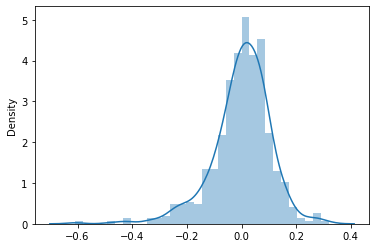

In [288]:
##Checking for distribution plot
sns.distplot(y_res)

#### Checking error terms plot

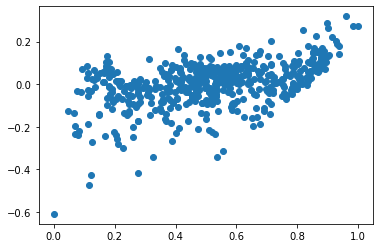

In [289]:
plt.scatter(y_tr, y_res)

### Testing of the model

In [290]:
df_test1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weathersit_Cloudy,weathersit_Mist
184,0,1,0,33.27085,63.7917,5.459106,6043,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [294]:
num

['atemp', 'hum', 'windspeed', 'cnt']

In [295]:
df_test1[num]=scaler.transform(df_test1[num])

In [301]:
#seperating y_test
y_tes=df_test1.pop('cnt')

In [304]:
X_test_rfe=df_test1[finalf]

In [306]:
X_test_rfe.head()

,yr,windspeed,mnth_December,mnth_February,mnth_January,mnth_March,weathersit_Mist,atemp
184,0,0.084219,0,0,0,0,1,0.769660
535,1,0.153728,0,0,0,0,0,0.842587
299,0,0.334206,0,0,0,0,1,0.496145
221,0,0.339570,0,0,0,0,0,0.795343
152,0,0.537414,0,0,0,0,0,0.741471


In [307]:
##adding constant
x_test_rfe_sm=sm.add_constant(X_test_rfe)

In [308]:
#predicting on test data
y_test_rfe=lr_model_check3.predict(x_test_rfe_sm)

In [309]:
##Check the r squared
print('R squared for test data is: ',r2_score(y_tes, y_test_rfe))

R squared for test data is:  0.7409120076427643


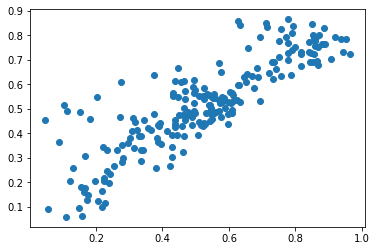

In [310]:
##Checking scatter
plt.scatter(y_tes, y_test_rfe)
plt.show()